对计算机而言，能够“看到”的是图像被编码之后的数字，但它很难解高层语义概念，比如图像或者视频帧中出现目标的是人还是物体，更无法定位目标出现在图像中哪个区域。目标检测的主要目的是让计算机可以自动识别图片或者视频帧中所有目标的类别，并在该目标周围绘制边界框，标示出每个目标的位置，如 **图1** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/e25116d994724f83abe3bef7f033c1c89bf34e083075494bb7833947c557f4fc" width = "700"  div align=center" width = "800"></center>
<center><br>图1：图像分类和目标检测示意图</br></center>
<br></br>
  
* 图1（a）是图像分类任务，只需识别出这是一张斑马的图片。 
* 图1（b）是目标检测任务，不仅要识别出这是一张斑马的图片，还要标出图中斑马的位置。

# 目标检测发展历程

在上一节中我们学习了图像分类处理基本流程，先使用卷积神经网络提取图像特征，然后再用这些特征预测分类概率，根据训练样本标签建立起分类损失函数，开启端到端的训练，如 **图2** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/d131c45973a244c590c3d1ee3866a694b134299542284b22b794e4ab76c4769d" width = "800"></center>
<center><br>图2：图像分类流程示意图</br></center>
<br></br>

但对于目标检测问题，按照 **图2** 的流程则行不通。因为在图像分类任务中，对整张图提取特征的过程中没能体现出不同目标之间的区别，最终也就没法分别标示出每个物体所在的位置。

为了解决这个问题，结合图片分类任务取得的成功经验，我们可以将目标检测任务进行拆分。假设我们现在有某种方式可以在输入图片上生成一系列可能包含物体的区域，这些区域称为候选区域，在一张图上可以生成很多个候选区域。然后对每个候选区域，可以把它单独当成一幅图像来看待，使用图像分类模型对它进行分类，看它属于哪个类别或者背景（即不包含任何物体的类别）。

上一节我们学过如何解决图像分类任务，使用卷积神经网络对一幅图像进行分类不再是一件困难的事情。那么，现在问题的关键就是如何产生候选区域？比如我们可以使用穷举法来产生候选区域，如图3所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/57755ac8e95a460f9262afc7c37a0db51f66027ff86c40e2967a2e22524c20a1" width = "800"></center>
<center><br>图3：候选区域</br></center>
<br></br>

A为图像上的某个像素点，B为A右下方另外一个像素点，A、B两点可以确定一个矩形框，记作AB。

* 如图3（a）所示：A在图片左上角位置，B遍历除A之外的所有位置，生成矩形框A1B1, …, A1Bn, …
* 如图3（b）所示：A在图片中间某个位置，B遍历A右下方所有位置，生成矩形框AkB1, …, AkBn, …

当A遍历图像上所有像素点，B则遍历它右下方所有的像素点，最终生成的矩形框集合{AiBj}将会包含图像上所有可以选择的区域。

只要我们对每个候选区域的分类足够的准确，则一定能找到跟实际物体足够接近的区域来。穷举法也许能得到正确的预测结果，但其计算量也是非常巨大的，其所生成的总的候选区域数目约为$\frac{W^2 H^2}{4}$，假设$H=W=100$，总数将会达到$2.5 \times 10^{7}$个，如此多的候选区域使得这种方法几乎没有什么实用性。但是通过这种方式，我们可以看出，假设分类任务完成的足够完美，从理论上来讲检测任务也是可以解决的，亟待解决的问题是如何设计出合适的方法来产生候选区域。

科学家们开始思考，是否可以应用传统图像算法先产生候选区域，然后再用卷积神经网络对这些区域进行分类？

* 2013年，[Ross Girshick](https://arxiv.org/abs/1311.2524) 等人于首次将CNN的方法应用在目标检测任务上，他们使用传统图像算法[selective search](https://link.springer.com/article/10.1007/s11263-013-0620-5)产生候选区域，取得了极大的成功，这就是对目标检测领域影响深远的区域卷积神经网络(R-CNN)模型。
* 2015年，[Ross Girshick](https://arxiv.org/abs/1504.08083) 对此方法进行了改进，提出了Fast RCNN模型。通过将不同区域的物体共用卷积层的计算，大大缩减了计算量，提高了处理速度，而且还引入了调整目标物体位置的回归方法，进一步提高了位置预测的准确性。
* 2015年，[Shaoqing Ren](https://arxiv.org/abs/1506.01497) 等人提出了Faster RCNN模型，提出了RPN的方法来产生物体的候选区域，这一方法里面不再需要使用传统的图像处理算法来产生候选区域，进一步提升了处理速度。
* 2017年，[Kaiming He](https://arxiv.org/abs/1703.06870) 等人于提出了Mask RCNN模型，只需要在Faster RCNN模型上添加比较少的计算量，就可以同时实现目标检测和物体实例分割两个任务。

以上都是基于R-CNN系列的著名模型，对目标检测方向的发展有着较大的影响力。此外，还有一些其他模型，比如[SSD](https://arxiv.org/abs/1512.02325)、YOLO([1](https://arxiv.org/abs/1506.02640v5), [2](https://arxiv.org/abs/1612.08242), [3](https://arxiv.org/abs/1804.02767))、[R-FCN](https://arxiv.org/abs/1605.06409)等也都是目标检测领域流行的模型结构。

R-CNN的系列算法分成两个阶段，先在图像上产生候选区域，再对候选区域进行分类并预测目标物体位置，它们通常被叫做两阶段检测算法。SSD和YOLO算法则只使用一个网络同时产生候选区域并预测出物体的类别和位置，所以它们通常被叫做单阶段检测算法。由于篇幅所限，本章将重点介绍YOLO-V3算法，并用其完成林业病虫害数据集中的昆虫检测任务，主要涵盖如下内容：

* 图像检测基础概念：介绍与目标检测任相关的基本概念，包括边界框、锚框和交并比等。
* 林业病虫害数据集：介绍数据集结构及数据预处理方法。
* YOLO-V3目标检测模型：介绍算法原理，及如何应用林业病虫害数据集进行模型训练和测试。


## 目标检测基础概念

在介绍目标检测算法之前，先介绍一些跟检测相关的基本概念，包括边界框、锚框和交并比等。

### 边界框（bounding box）

检测任务需要同时预测物体的类别和位置，因此需要引入一些跟位置相关的概念。通常使用边界框（bounding box，bbox）来表示物体的位置，边界框是正好能包含住物体的矩形框，如 **图4** 所示，图中3个人分别对应3个边界框。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/f581e1bfd07a414596368c9c03a1b30ea115a2e30a014be68b2c26961f5c38fa" width = "400"  div align=center"></center>
<center><br>图4：边界框</br></center>
<br></br>

通常有两种格式来表示边界框的位置：

1. xyxy，即$(x_1, y_1, x_2, y_2)$，其中$(x_1, y_1)$是矩形框左上角的坐标，$(x_2, y_2)$是矩形框右下角的坐标。图4中3个红色矩形框用xyxy格式表示如下：
  
* 左：$(40.93, 141.1, 226.99, 515.73)$。
* 中：$(214.29, 325.03, 399.82, 631.37)$。
* 右：$(247.2, 131.62, 480.0, 639.32)$。
  
2. xywh，即$(x, y, w, h)$，其中$(x, y)$是矩形框中心点的坐标，w是矩形框的宽度，h是矩形框的高度。

在检测任务中，训练数据集的标签里会给出目标物体真实边界框所对应的$(x_1, y_1, x_2, y_2)$，这样的边界框也被称为真实框（ground truth box），如 **图4** 所示，图中画出了3个人像所对应的真实框。模型会对目标物体可能出现的位置进行预测，由模型预测出的边界框则称为预测框（prediction box）。
  
------

**注意：**

1. 在阅读代码时，请注意使用的是哪一种格式的表示方式。
1. 图片坐标的原点在左上角，x轴向右为正方向，y轴向下为正方向。

------

要完成一项检测任务，我们通常希望模型能够根据输入的图片，输出一些预测的边界框，以及边界框中所包含的物体的类别或者说属于某个类别的概率，例如这种格式: $[L, P, x_1, y_1, x_2, y_2]$，其中L是类别标签，P是物体属于该类别的概率。一张输入图片可能会产生多个预测框，接下来让我们一起学习如何完成这样一项任务。

### 锚框（Anchor）

锚框与物体边界框不同，是由人们假想出来的一种框。先设定好锚框的大小和形状，再以图像上某一个点为中心画出矩形框。在下图中，以像素点[300, 500]为中心可以使用下面的程序生成3个框，如图中蓝色框所示，其中锚框A1跟人像区域非常接近。

(300.0, 500.0, 282.84271247461896, 141.4213562373095)
(300.0, 500.0, 200.0, 200.0)
(300.0, 500.0, 141.42135623730948, 282.842712474619)


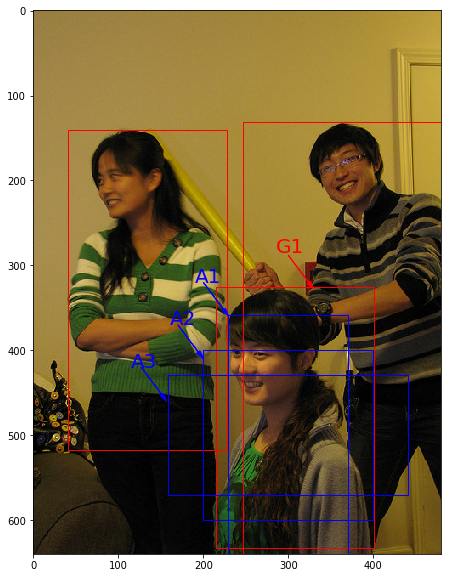

In [ ]:
# 画图展示如何绘制边界框和锚框
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.image import imread
import math

# 定义画矩形框的程序    
def draw_rectangle(currentAxis, bbox, edgecolor = 'k', facecolor = 'y', fill=False, linestyle='-'):
    # currentAxis，坐标轴，通过plt.gca()获取
    # bbox，边界框，包含四个数值的list， [x1, y1, x2, y2]
    # edgecolor，边框线条颜色
    # facecolor，填充颜色
    # fill, 是否填充
    # linestype，边框线型
    # patches.Rectangle需要传入左上角坐标、矩形区域的宽度、高度等参数
    rect=patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0]+1, bbox[3]-bbox[1]+1, linewidth=1,
                           edgecolor=edgecolor,facecolor=facecolor,fill=fill, linestyle=linestyle)
    currentAxis.add_patch(rect)

    
plt.figure(figsize=(10, 10))

filename = '/home/aistudio/work/images/section3/000000086956.jpg'
im = imread(filename)
plt.imshow(im)

# 使用xyxy格式表示物体真实框
bbox1 = [214.29, 325.03, 399.82, 631.37]
bbox2 = [40.93, 141.1, 226.99, 515.73]
bbox3 = [247.2, 131.62, 480.0, 639.32]

currentAxis=plt.gca()

draw_rectangle(currentAxis, bbox1, edgecolor='r')
draw_rectangle(currentAxis, bbox2, edgecolor='r')
draw_rectangle(currentAxis, bbox3,edgecolor='r')

# 绘制锚框
def draw_anchor_box(center, length, scales, ratios, img_height, img_width):
    """
    以center为中心，产生一系列锚框
    其中length指定了一个基准的长度
    scales是包含多种尺寸比例的list
    ratios是包含多种长宽比的list
    img_height和img_width是图片的尺寸，生成的锚框范围不能超出图片尺寸之外
    """
    bboxes = []
    for scale in scales:
        for ratio in ratios:
            h = length*scale*math.sqrt(ratio)
            w = length*scale/math.sqrt(ratio) 
            x1 = max(center[0] - w/2., 0.)
            y1 = max(center[1] - h/2., 0.)
            x2 = min(center[0] + w/2. - 1.0, img_width - 1.0)
            y2 = min(center[1] + h/2. - 1.0, img_height - 1.0)
            print(center[0], center[1], w, h)
            bboxes.append([x1, y1, x2, y2])

    for bbox in bboxes:
        draw_rectangle(currentAxis, bbox, edgecolor = 'b')

img_height = im.shape[0]
img_width = im.shape[1]        
draw_anchor_box([300., 500.], 100., [2.0], [0.5, 1.0, 2.0], img_height, img_width)


################# 以下为添加文字说明和箭头###############################

plt.text(285, 285, 'G1', color='red', fontsize=20)
plt.arrow(300, 288, 30, 40, color='red', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

plt.text(190, 320, 'A1', color='blue', fontsize=20)
plt.arrow(200, 320, 30, 40, color='blue', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

plt.text(160, 370, 'A2', color='blue', fontsize=20)
plt.arrow(170, 370, 30, 40, color='blue', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

plt.text(115, 420, 'A3', color='blue', fontsize=20)
plt.arrow(127, 420, 30, 40, color='blue', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

#draw_anchor_box([200., 200.], 100., [2.0], [0.5, 1.0, 2.0])    
plt.show()



在目标检测模型中，通常会以某种规则在图片上生成一系列锚框，将这些锚框当成可能的候选区域。模型对这些候选区域是否包含物体进行预测，如果包含目标物体，则还需要进一步预测出物体所属的类别。还有更为重要的一点是，由于锚框位置是固定的，它不大可能刚好跟物体边界框重合，所以需要在锚框的基础上进行微调以形成能准确描述物体位置的预测框，模型需要预测出微调的幅度。在训练过程中，模型通过学习不断的调整参数，最终能学会如何判别出锚框所代表的候选区域是否包含物体，如果包含物体的话，物体属于哪个类别，以及物体边界框相对于锚框位置需要调整的幅度。

不同的模型往往有着不同的生成锚框的方式，在后面的内容中，会详细介绍YOLO-V3算法里面产生锚框的规则，理解了它的设计方案，也很容易类推到其它模型上。

### 交并比

上面我们画出了以点$(300, 500)$为中心，生成的三个锚框，我们可以看到锚框A1 与真实框 G1的重合度比较好。那么如何衡量这三个锚框跟真实框之间的关系呢，在检测任务中是使用交并比（Intersection of Union，IoU）作为衡量指标。这一概念来源于数学中的集合，用来描述两个集合$A$和$B$之间的关系，它等于两个集合的交集里面所包含的元素个数，除以它们的并集里面所包含的元素个数，具体计算公式如下：

$$IoU = \frac{A\cap B}{A \cup B}$$

我们将用这个概念来描述两个框之间的重合度。两个框可以看成是两个像素的集合，它们的交并比等于两个框重合部分的面积除以它们合并起来的面积。下图a中红色区域是两个框的重合面积，图b中蓝色区域是两个框的相并面积。用这两个面积相除即可得到它们之间的交并比，如 **图5** 所示。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/1eaa96c6dd8149f59665d80384ba189eb9f4c9bcc5ef47a79027385cbac033a0" width = "300"></center>
<center><br>图5：交并比</br></center>
<br></br>


假设两个矩形框A和B的位置分别为：
$$A:  [x_{a1}, y_{a1}, x_{a2}, y_{a2}]$$

$$B:  [x_{b1}, y_{b1}, x_{b2}, y_{b2}]$$

假如位置关系如 **图6** 所示：
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/50bbb215ee9d4c048fd8788e2828ec7694199c6eadf746dfb9a7b83c79c17a45" width = "300"></center>
<center><br>图6：计算交并比</br></center>
<br></br>

如果二者有相交部分，则相交部分左上角坐标为：
$$x_1 = max(x_{a1}, x_{b1}), \ \ \ \ \ y_1 = max(y_{a1}, y_{b1})$$

相交部分右下角坐标为：
$$x_2 = min(x_{a2}, x_{b2}), \ \ \ \ \ y_2 = min(y_{a2}, y_{b2})$$

计算先交部分面积：
$$intersection = max(x_2 - x_1 + 1.0, 0) \cdot max(y_2 - y_1 + 1.0, 0)$$

矩形框A和B的面积分别是：
$$S_A = (x_{a2} - x_{a1} + 1.0) \cdot (y_{a2} - y_{a1} + 1.0)$$

$$S_B = (x_{b2} - x_{b1} + 1.0) \cdot (y_{b2} - y_{b1} + 1.0)$$

计算相并部分面积：
$$union = S_A + S_B - intersection$$

计算交并比：

$$IoU = \frac{intersection}{union}$$

------
**思考：**

两个矩形框之间的相对位置关系，除了上面的示意图之外，还有哪些可能，上面的公式能否覆盖所有的情形？

------

并交比计算程序如下：

In [ ]:
# 计算IoU，矩形框的坐标形式为xyxy，这个函数会被保存在box_utils.py文件中
def box_iou_xyxy(box1, box2):
    # 获取box1左上角和右下角的坐标
    x1min, y1min, x1max, y1max = box1[0], box1[1], box1[2], box1[3]
    # 计算box1的面积
    s1 = (y1max - y1min + 1.) * (x1max - x1min + 1.)
    # 获取box2左上角和右下角的坐标
    x2min, y2min, x2max, y2max = box2[0], box2[1], box2[2], box2[3]
    # 计算box2的面积
    s2 = (y2max - y2min + 1.) * (x2max - x2min + 1.)
    
    # 计算相交矩形框的坐标
    xmin = np.maximum(x1min, x2min)
    ymin = np.maximum(y1min, y2min)
    xmax = np.minimum(x1max, x2max)
    ymax = np.minimum(y1max, y2max)
    # 计算相交矩形行的高度、宽度、面积
    inter_h = np.maximum(ymax - ymin + 1., 0.)
    inter_w = np.maximum(xmax - xmin + 1., 0.)
    intersection = inter_h * inter_w
    # 计算相并面积
    union = s1 + s2 - intersection
    # 计算交并比
    iou = intersection / union
    return iou


bbox1 = [100., 100., 200., 200.]
bbox2 = [120., 120., 220., 220.]
iou = box_iou_xyxy(bbox1, bbox2)
print('IoU is {}'.format(iou))  

IoU is 0.474026443176


In [ ]:
# 计算IoU，矩形框的坐标形式为xywh
def box_iou_xywh(box1, box2):
    x1min, y1min = box1[0] - box1[2]/2.0, box1[1] - box1[3]/2.0
    x1max, y1max = box1[0] + box1[2]/2.0, box1[1] + box1[3]/2.0
    s1 = box1[2] * box1[3]

    x2min, y2min = box2[0] - box2[2]/2.0, box2[1] - box2[3]/2.0
    x2max, y2max = box2[0] + box2[2]/2.0, box2[1] + box2[3]/2.0
    s2 = box2[2] * box2[3]

    xmin = np.maximum(x1min, x2min)
    ymin = np.maximum(y1min, y2min)
    xmax = np.minimum(x1max, x2max)
    ymax = np.minimum(y1max, y2max)
    inter_h = np.maximum(ymax - ymin, 0.)
    inter_w = np.maximum(xmax - xmin, 0.)
    intersection = inter_h * inter_w

    union = s1 + s2 - intersection
    iou = intersection / union
    return iou

为了直观的展示交并比的大小跟重合程度之间的关系，**图7** 示意了不同交并比下两个框之间的相对位置关系，从 IoU = 0.95 到 IoU = 0.
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/4befa4f120ca48a1a41986bf5542abb8ec136a1545214264bbf78e315cfb03f9" width = "500"></center>
<center><br>图7：不同交并比下两个框之间相对位置示意图</br></center>
<br></br>

------
**问题：**

1. 什么情况下两个矩形框的IoU等于1？
1. 什么情况下两个矩形框的IoU等于0？

------

# 林业病虫害数据集和数据预处理方法介绍

在本次的课程中，将使用百度与林业大学合作开发的林业病虫害防治项目中用到昆虫数据集，关于该项目和数据集的更多信息，可以参考[相关报道](补充报道文章链接)。在这一小节中将为读者介绍该数据集，以及计算机视觉任务中常用的数据预处理方法。
   
## 读取AI识虫数据集标注信息

AI识虫数据集结构如下：

* 提供了2183张图片，其中训练集1693张，验证集245，测试集245张。
* 包含7种昆虫，分别是Boerner、Leconte、Linnaeus、acuminatus、armandi、coleoptera和linnaeus。
* 包含了图片和标注，请读者先将数据解压，并存放在insects目录下。

In [ ]:
# 解压数据脚本，第一次运行时打开注释，将文件解压到work目录下
# !unzip -d /home/aistudio/work /home/aistudio/data/data19638/insects.zip

将数据解压之后，可以看到insects目录下的结构如下所示。

        insects
            |---train
            |         |---annotations
            |         |         |---xmls
            |         |                  |---100.xml
            |         |                  |---101.xml
            |         |                  |---...
            |         |
            |         |---images
            |                   |---100.jpeg
            |                   |---101.jpeg
            |                   |---...
            |
            |---val
            |        |---annotations
            |        |         |---xmls
            |        |                  |---1221.xml
            |        |                  |---1277.xml
            |        |                  |---...
            |        |
            |        |---images
            |                  |---1221.jpeg
            |                  |---1277.jpeg
            |                  |---...
            |
            |---test
                     |---images
                               |---1833.jpeg
                               |---1838.jpeg
                               |---...

insects包含train、val和test三个文件夹。train/annotations/xmls目录下存放着图片的标注。每个xml文件是对一张图片的说明，包括图片尺寸、包含的昆虫名称、在图片上出现的位置等信息。

In [ ]:
<annotation>
        <folder>刘霏霏</folder>
        <filename>100.jpeg</filename>
        <path>/home/fion/桌面/刘霏霏/100.jpeg</path>
        <source>
                <database>Unknown</database>
        </source>
        <size>
                <width>1336</width>
                <height>1336</height>
                <depth>3</depth>
        </size>
        <segmented>0</segmented>
        <object>
                <name>Boerner</name>
                <pose>Unspecified</pose>
                <truncated>0</truncated>
                <difficult>0</difficult>
                <bndbox>
                        <xmin>500</xmin>
                        <ymin>893</ymin>
                        <xmax>656</xmax>
                        <ymax>966</ymax>
                </bndbox>
        </object>
        <object>
                <name>Leconte</name>
                <pose>Unspecified</pose>
                <truncated>0</truncated>
                <difficult>0</difficult>
                <bndbox>
                        <xmin>622</xmin>
                        <ymin>490</ymin>
                        <xmax>756</xmax>
                        <ymax>610</ymax>
                </bndbox>
        </object>
        <object>
                <name>armandi</name>
                <pose>Unspecified</pose>
                <truncated>0</truncated>
                <difficult>0</difficult>
                <bndbox>
                        <xmin>432</xmin>
                        <ymin>663</ymin>
                        <xmax>517</xmax>
                        <ymax>729</ymax>
                </bndbox>
        </object>
        <object>
                <name>coleoptera</name>
                <pose>Unspecified</pose>
                <truncated>0</truncated>
                <difficult>0</difficult>
                <bndbox>
                        <xmin>624</xmin>
                        <ymin>685</ymin>
                        <xmax>697</xmax>
                        <ymax>771</ymax>
                </bndbox>
        </object>
        <object>
                <name>linnaeus</name>
                <pose>Unspecified</pose>
                <truncated>0</truncated>
                <difficult>0</difficult>
                <bndbox>
                        <xmin>783</xmin>
                        <ymin>700</ymin>
                        <xmax>856</xmax>
                        <ymax>802</ymax>
                </bndbox>
        </object>
</annotation>

上面列出的xml文件中的主要参数说明如下：

-size：图片尺寸

-object：图片中包含的物体，一张图片可能中包含多个物体

* name：昆虫名称
* bndbox：物体真实框
* difficult：识别是否困难


下面我们将从数据集中读取xml文件，将每张图片的标注信息读取出来。在读取具体的标注文件之前，我们先完成一件事情，就是将昆虫的类别名字（字符串）转化成数字表示的类别。因为神经网络里面计算时需要的输入类型是数值型的，所以需要将字符串表示的类别转化成具体的数字。昆虫类别名称的列表是：['Boerner', 'Leconte', 'Linnaeus', 'acuminatus', 'armandi', 'coleoptera', 'linnaeus']，这里我们约定此列表中：'Boerner'对应类别0，'Leconte'对应类别1，...，'linnaeus'对应类别6。使用下面的程序可以得到表示名称字符串和数字类别之间映射关系的字典。

In [ ]:
INSECT_NAMES = ['Boerner', 'Leconte', 'Linnaeus', 
                'acuminatus', 'armandi', 'coleoptera', 'linnaeus']

def get_insect_names():
    """
    return a dict, as following,
        {'Boerner': 0,
         'Leconte': 1,
         'Linnaeus': 2, 
         'acuminatus': 3,
         'armandi': 4,
         'coleoptera': 5,
         'linnaeus': 6
        }
    It can map the insect name into an integer label.
    """
    insect_category2id = {}
    for i, item in enumerate(INSECT_NAMES):
        insect_category2id[item] = i

    return insect_category2id

In [ ]:
cname2cid = get_insect_names()
cname2cid

{'Boerner': 0,
 'Leconte': 1,
 'Linnaeus': 2,
 'acuminatus': 3,
 'armandi': 4,
 'coleoptera': 5,
 'linnaeus': 6}

调用get_insect_names函数返回一个dict，其键-值对描述了昆虫名称-数字类别之间的映射关系。

下面的程序从annotations/xml目录下面读取所有文件标注信息。

In [ ]:
import os
import numpy as np
import xml.etree.ElementTree as ET

def get_annotations(cname2cid, datadir):
    filenames = os.listdir(os.path.join(datadir, 'annotations', 'xmls'))
    records = []
    ct = 0
    for fname in filenames:
        fid = fname.split('.')[0]
        fpath = os.path.join(datadir, 'annotations', 'xmls', fname)
        img_file = os.path.join(datadir, 'images', fid + '.jpeg')
        tree = ET.parse(fpath)

        if tree.find('id') is None:
            im_id = np.array([ct])
        else:
            im_id = np.array([int(tree.find('id').text)])

        objs = tree.findall('object')
        im_w = float(tree.find('size').find('width').text)
        im_h = float(tree.find('size').find('height').text)
        gt_bbox = np.zeros((len(objs), 4), dtype=np.float32)
        gt_class = np.zeros((len(objs), ), dtype=np.int32)
        is_crowd = np.zeros((len(objs), ), dtype=np.int32)
        difficult = np.zeros((len(objs), ), dtype=np.int32)
        for i, obj in enumerate(objs):
            cname = obj.find('name').text
            gt_class[i] = cname2cid[cname]
            _difficult = int(obj.find('difficult').text)
            x1 = float(obj.find('bndbox').find('xmin').text)
            y1 = float(obj.find('bndbox').find('ymin').text)
            x2 = float(obj.find('bndbox').find('xmax').text)
            y2 = float(obj.find('bndbox').find('ymax').text)
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(im_w - 1, x2)
            y2 = min(im_h - 1, y2)
            # 这里使用xywh格式来表示目标物体真实框
            gt_bbox[i] = [(x1+x2)/2.0 , (y1+y2)/2.0, x2-x1+1., y2-y1+1.]
            is_crowd[i] = 0
            difficult[i] = _difficult

        voc_rec = {
            'im_file': img_file,
            'im_id': im_id,
            'h': im_h,
            'w': im_w,
            'is_crowd': is_crowd,
            'gt_class': gt_class,
            'gt_bbox': gt_bbox,
            'gt_poly': [],
            'difficult': difficult
            }
        if len(objs) != 0:
            records.append(voc_rec)
        ct += 1
    return records

In [ ]:
TRAINDIR = '/home/aistudio/work/insects/train'
TESTDIR = '/home/aistudio/work/insects/test'
VALIDDIR = '/home/aistudio/work/insects/val'
cname2cid = get_insect_names()
records = get_annotations(cname2cid, TRAINDIR)

In [ ]:
len(records)

1693

In [ ]:
records[0]

{'difficult': array([0, 0, 0, 0, 0], dtype=int32),
 'gt_bbox': array([[600. , 344.5, 135. , 172. ],
        [540.5, 705. ,  56. , 129. ],
        [661. , 831. ,  81. ,  71. ],
        [782.5, 545.5,  48. ,  82. ],
        [823. , 678. ,  59. ,  75. ]], dtype=float32),
 'gt_class': array([1, 0, 4, 2, 5], dtype=int32),
 'gt_poly': [],
 'h': 1224.0,
 'im_file': '/home/aistudio/work/insects/train/images/693.jpeg',
 'im_id': array([0]),
 'is_crowd': array([0, 0, 0, 0, 0], dtype=int32),
 'w': 1224.0}

通过上面的程序，将所有训练数据集的标注数据全部读取出来了，存放在records列表下面，其中每一个元素是一张图片的标注数据，包含了图片存放地址，图片id，图片高度和宽度，图片中所包含的目标物体的种类和位置。

## 数据读取和预处理

数据预处理是训练神经网络时非常重要的步骤。合适的预处理方法，可以帮助模型更好的收敛并防止过拟合。首先我们需要从磁盘读入数据，然后需要对这些数据进行预处理，为了保证网络运行的速度通常还要对数据预处理进行加速。

### 数据读取

前面已经将图片的所有描述信息保存在records中了，其中的每一个元素包含了一张图片的描述，下面的程序展示了如何根据records里面的描述读取图片及标注。

In [ ]:
### 数据读取
import cv2

def get_bbox(gt_bbox, gt_class):
    # 对于一般的检测任务来说，一张图片上往往会有多个目标物体
    # 设置参数MAX_NUM = 50， 即一张图片最多取50个真实框；如果真实
    # 框的数目少于50个，则将不足部分的gt_bbox, gt_class和gt_score的各项数值全设置为0
    MAX_NUM = 50
    gt_bbox2 = np.zeros((MAX_NUM, 4))
    gt_class2 = np.zeros((MAX_NUM,))
    for i in range(len(gt_bbox)):
        gt_bbox2[i, :] = gt_bbox[i, :]
        gt_class2[i] = gt_class[i]
        if i >= MAX_NUM:
            break
    return gt_bbox2, gt_class2

def get_img_data_from_file(record):
    """
    record is a dict as following,
      record = {
            'im_file': img_file,
            'im_id': im_id,
            'h': im_h,
            'w': im_w,
            'is_crowd': is_crowd,
            'gt_class': gt_class,
            'gt_bbox': gt_bbox,
            'gt_poly': [],
            'difficult': difficult
            }
    """
    im_file = record['im_file']
    h = record['h']
    w = record['w']
    is_crowd = record['is_crowd']
    gt_class = record['gt_class']
    gt_bbox = record['gt_bbox']
    difficult = record['difficult']

    img = cv2.imread(im_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # check if h and w in record equals that read from img
    assert img.shape[0] == int(h), \
             "image height of {} inconsistent in record({}) and img file({})".format(
               im_file, h, img.shape[0])

    assert img.shape[1] == int(w), \
             "image width of {} inconsistent in record({}) and img file({})".format(
               im_file, w, img.shape[1])

    gt_boxes, gt_labels = get_bbox(gt_bbox, gt_class)

    # gt_bbox 用相对值
    gt_boxes[:, 0] = gt_boxes[:, 0] / float(w)
    gt_boxes[:, 1] = gt_boxes[:, 1] / float(h)
    gt_boxes[:, 2] = gt_boxes[:, 2] / float(w)
    gt_boxes[:, 3] = gt_boxes[:, 3] / float(h)
  
    return img, gt_boxes, gt_labels, (h, w)

In [ ]:
record = records[0]
img, gt_boxes, gt_labels, scales = get_img_data_from_file(record)

In [ ]:
img.shape

(1224, 1224, 3)

In [ ]:
gt_boxes.shape

(50, 4)

In [ ]:
gt_labels

array([1., 0., 4., 2., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
scales

(1224.0, 1224.0)

get_img_data_from_file()函数可以返回图片数据的数据，它们是图像数据img, 真实框坐标gt_boxes, 真实框包含的物体类别gt_labels, 图像尺寸scales。

### 数据预处理

在计算机视觉中，通常会对图像做一些随机的变化，产生相似但又不完全相同的样本。主要作用是扩大训练数据集，抑制过拟合，提升模型的泛化能力，常用的方法见下面的程序。


#### **随机改变亮暗、对比度和颜色等**

In [ ]:
import numpy as np
import cv2
from PIL import Image, ImageEnhance
import random

# 随机改变亮暗、对比度和颜色等
def random_distort(img):
    # 随机改变亮度
    def random_brightness(img, lower=0.5, upper=1.5):
        e = np.random.uniform(lower, upper)
        return ImageEnhance.Brightness(img).enhance(e)
    # 随机改变对比度
    def random_contrast(img, lower=0.5, upper=1.5):
        e = np.random.uniform(lower, upper)
        return ImageEnhance.Contrast(img).enhance(e)
    # 随机改变颜色
    def random_color(img, lower=0.5, upper=1.5):
        e = np.random.uniform(lower, upper)
        return ImageEnhance.Color(img).enhance(e)

    ops = [random_brightness, random_contrast, random_color]
    np.random.shuffle(ops)

    img = Image.fromarray(img)
    img = ops[0](img)
    img = ops[1](img)
    img = ops[2](img)
    img = np.asarray(img)

    return img

#### **随机填充**

In [ ]:
# 随机填充
def random_expand(img,
                  gtboxes,
                  max_ratio=4.,
                  fill=None,
                  keep_ratio=True,
                  thresh=0.5):
    if random.random() > thresh:
        return img, gtboxes

    if max_ratio < 1.0:
        return img, gtboxes

    h, w, c = img.shape
    ratio_x = random.uniform(1, max_ratio)
    if keep_ratio:
        ratio_y = ratio_x
    else:
        ratio_y = random.uniform(1, max_ratio)
    oh = int(h * ratio_y)
    ow = int(w * ratio_x)
    off_x = random.randint(0, ow - w)
    off_y = random.randint(0, oh - h)

    out_img = np.zeros((oh, ow, c))
    if fill and len(fill) == c:
        for i in range(c):
            out_img[:, :, i] = fill[i] * 255.0

    out_img[off_y:off_y + h, off_x:off_x + w, :] = img
    gtboxes[:, 0] = ((gtboxes[:, 0] * w) + off_x) / float(ow)
    gtboxes[:, 1] = ((gtboxes[:, 1] * h) + off_y) / float(oh)
    gtboxes[:, 2] = gtboxes[:, 2] / ratio_x
    gtboxes[:, 3] = gtboxes[:, 3] / ratio_y

    return out_img.astype('uint8'), gtboxes

#### **随机裁剪**

随机裁剪之前需要先定义两个函数，multi_box_iou_xywh和box_crop这两个函数将被保存在box_utils.py文件中。

In [ ]:
import numpy as np

def multi_box_iou_xywh(box1, box2):
    """
    In this case, box1 or box2 can contain multi boxes.
    Only two cases can be processed in this method:
       1, box1 and box2 have the same shape, box1.shape == box2.shape
       2, either box1 or box2 contains only one box, len(box1) == 1 or len(box2) == 1
    If the shape of box1 and box2 does not match, and both of them contain multi boxes, it will be wrong.
    """
    assert box1.shape[-1] == 4, "Box1 shape[-1] should be 4."
    assert box2.shape[-1] == 4, "Box2 shape[-1] should be 4."


    b1_x1, b1_x2 = box1[:, 0] - box1[:, 2] / 2, box1[:, 0] + box1[:, 2] / 2
    b1_y1, b1_y2 = box1[:, 1] - box1[:, 3] / 2, box1[:, 1] + box1[:, 3] / 2
    b2_x1, b2_x2 = box2[:, 0] - box2[:, 2] / 2, box2[:, 0] + box2[:, 2] / 2
    b2_y1, b2_y2 = box2[:, 1] - box2[:, 3] / 2, box2[:, 1] + box2[:, 3] / 2

    inter_x1 = np.maximum(b1_x1, b2_x1)
    inter_x2 = np.minimum(b1_x2, b2_x2)
    inter_y1 = np.maximum(b1_y1, b2_y1)
    inter_y2 = np.minimum(b1_y2, b2_y2)
    inter_w = inter_x2 - inter_x1
    inter_h = inter_y2 - inter_y1
    inter_w = np.clip(inter_w, a_min=0., a_max=None)
    inter_h = np.clip(inter_h, a_min=0., a_max=None)

    inter_area = inter_w * inter_h
    b1_area = (b1_x2 - b1_x1) * (b1_y2 - b1_y1)
    b2_area = (b2_x2 - b2_x1) * (b2_y2 - b2_y1)

    return inter_area / (b1_area + b2_area - inter_area)

def box_crop(boxes, labels, crop, img_shape):
    x, y, w, h = map(float, crop)
    im_w, im_h = map(float, img_shape)

    boxes = boxes.copy()
    boxes[:, 0], boxes[:, 2] = (boxes[:, 0] - boxes[:, 2] / 2) * im_w, (
        boxes[:, 0] + boxes[:, 2] / 2) * im_w
    boxes[:, 1], boxes[:, 3] = (boxes[:, 1] - boxes[:, 3] / 2) * im_h, (
        boxes[:, 1] + boxes[:, 3] / 2) * im_h

    crop_box = np.array([x, y, x + w, y + h])
    centers = (boxes[:, :2] + boxes[:, 2:]) / 2.0
    mask = np.logical_and(crop_box[:2] <= centers, centers <= crop_box[2:]).all(
        axis=1)

    boxes[:, :2] = np.maximum(boxes[:, :2], crop_box[:2])
    boxes[:, 2:] = np.minimum(boxes[:, 2:], crop_box[2:])
    boxes[:, :2] -= crop_box[:2]
    boxes[:, 2:] -= crop_box[:2]

    mask = np.logical_and(mask, (boxes[:, :2] < boxes[:, 2:]).all(axis=1))
    boxes = boxes * np.expand_dims(mask.astype('float32'), axis=1)
    labels = labels * mask.astype('float32')
    boxes[:, 0], boxes[:, 2] = (boxes[:, 0] + boxes[:, 2]) / 2 / w, (
        boxes[:, 2] - boxes[:, 0]) / w
    boxes[:, 1], boxes[:, 3] = (boxes[:, 1] + boxes[:, 3]) / 2 / h, (
        boxes[:, 3] - boxes[:, 1]) / h

    return boxes, labels, mask.sum()

In [ ]:
# 随机裁剪
def random_crop(img,
                boxes,
                labels,
                scales=[0.3, 1.0],
                max_ratio=2.0,
                constraints=None,
                max_trial=50):
    if len(boxes) == 0:
        return img, boxes

    if not constraints:
        constraints = [(0.1, 1.0), (0.3, 1.0), (0.5, 1.0), (0.7, 1.0),
                       (0.9, 1.0), (0.0, 1.0)]

    img = Image.fromarray(img)
    w, h = img.size
    crops = [(0, 0, w, h)]
    for min_iou, max_iou in constraints:
        for _ in range(max_trial):
            scale = random.uniform(scales[0], scales[1])
            aspect_ratio = random.uniform(max(1 / max_ratio, scale * scale), \
                                          min(max_ratio, 1 / scale / scale))
            crop_h = int(h * scale / np.sqrt(aspect_ratio))
            crop_w = int(w * scale * np.sqrt(aspect_ratio))
            crop_x = random.randrange(w - crop_w)
            crop_y = random.randrange(h - crop_h)
            crop_box = np.array([[(crop_x + crop_w / 2.0) / w,
                                  (crop_y + crop_h / 2.0) / h,
                                  crop_w / float(w), crop_h / float(h)]])

            iou = multi_box_iou_xywh(crop_box, boxes)
            if min_iou <= iou.min() and max_iou >= iou.max():
                crops.append((crop_x, crop_y, crop_w, crop_h))
                break

    while crops:
        crop = crops.pop(np.random.randint(0, len(crops)))
        crop_boxes, crop_labels, box_num = box_crop(boxes, labels, crop, (w, h))
        if box_num < 1:
            continue
        img = img.crop((crop[0], crop[1], crop[0] + crop[2],
                        crop[1] + crop[3])).resize(img.size, Image.LANCZOS)
        img = np.asarray(img)
        return img, crop_boxes, crop_labels
    img = np.asarray(img)
    return img, boxes, labels

#### **随机缩放**

In [ ]:
# 随机缩放
def random_interp(img, size, interp=None):
    interp_method = [
        cv2.INTER_NEAREST,
        cv2.INTER_LINEAR,
        cv2.INTER_AREA,
        cv2.INTER_CUBIC,
        cv2.INTER_LANCZOS4,
    ]
    if not interp or interp not in interp_method:
        interp = interp_method[random.randint(0, len(interp_method) - 1)]
    h, w, _ = img.shape
    im_scale_x = size / float(w)
    im_scale_y = size / float(h)
    img = cv2.resize(
        img, None, None, fx=im_scale_x, fy=im_scale_y, interpolation=interp)
    return img

#### **随机翻转**

In [ ]:
# 随机翻转
def random_flip(img, gtboxes, thresh=0.5):
    if random.random() > thresh:
        img = img[:, ::-1, :]
        gtboxes[:, 0] = 1.0 - gtboxes[:, 0]
    return img, gtboxes

#### **随机打乱真实框排列顺序**

In [ ]:
# 随机打乱真实框排列顺序
def shuffle_gtbox(gtbox, gtlabel):
    gt = np.concatenate(
        [gtbox, gtlabel[:, np.newaxis]], axis=1)
    idx = np.arange(gt.shape[0])
    np.random.shuffle(idx)
    gt = gt[idx, :]
    return gt[:, :4], gt[:, 4]

#### **图像增广方法**

In [ ]:
# 图像增广方法汇总
def image_augment(img, gtboxes, gtlabels, size, means=None):
    # 随机改变亮暗、对比度和颜色等
    img = random_distort(img)
    # 随机填充
    img, gtboxes = random_expand(img, gtboxes, fill=means)
    # 随机裁剪
    img, gtboxes, gtlabels, = random_crop(img, gtboxes, gtlabels)
    # 随机缩放
    img = random_interp(img, size)
    # 随机翻转
    img, gtboxes = random_flip(img, gtboxes)
    # 随机打乱真实框排列顺序
    gtboxes, gtlabels = shuffle_gtbox(gtboxes, gtlabels)

    return img.astype('float32'), gtboxes.astype('float32'), gtlabels.astype('int32')


In [ ]:
img, gt_boxes, gt_labels, scales = get_img_data_from_file(record)
size = 512
img, gt_boxes, gt_labels = image_augment(img, gt_boxes, gt_labels, size)

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
gt_boxes.shape

(50, 4)

In [ ]:
gt_labels.shape

(50,)

这里得到的img数据数值需要调整，需要除以255.，并且减去均值和方差，再将维度从[H, W, C]调整为[C, H, W]

In [ ]:
img, gt_boxes, gt_labels, scales = get_img_data_from_file(record)
size = 512
img, gt_boxes, gt_labels = image_augment(img, gt_boxes, gt_labels, size)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
mean = np.array(mean).reshape((1, 1, -1))
std = np.array(std).reshape((1, 1, -1))
img = (img / 255.0 - mean) / std
img = img.astype('float32').transpose((2, 0, 1))
img

将上面的过程整理成一个函数get_img_data

In [ ]:
def get_img_data(record, size=640):
    img, gt_boxes, gt_labels, scales = get_img_data_from_file(record)
    img, gt_boxes, gt_labels = image_augment(img, gt_boxes, gt_labels, size)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    mean = np.array(mean).reshape((1, 1, -1))
    std = np.array(std).reshape((1, 1, -1))
    img = (img / 255.0 - mean) / std
    img = img.astype('float32').transpose((2, 0, 1))
    return img, gt_boxes, gt_labels, scales

In [ ]:
TRAINDIR = '/home/aistudio/work/insects/train'
TESTDIR = '/home/aistudio/work/insects/test'
VALIDDIR = '/home/aistudio/work/insects/val'
cname2cid = get_insect_names()
records = get_annotations(cname2cid, TRAINDIR)

record = records[0]
img, gt_boxes, gt_labels, scales = get_img_data(record, size=480)

In [ ]:
img.shape

(3, 480, 480)

In [ ]:
gt_boxes.shape

(50, 4)

In [ ]:
gt_labels

array([0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
scales

(1224.0, 1224.0)

### 批量数据读取与加速

上面的程序展示了如何读取一张图片的数据并加速，下面的代码实现了批量数据读取。



In [ ]:
# 获取一个批次内样本随机缩放的尺寸
def get_img_size(mode):
    if (mode == 'train') or (mode == 'valid'):
        inds = np.array([0,1,2,3,4,5,6,7,8,9])
        ii = np.random.choice(inds)
        img_size = 320 + ii * 32
    else:
        img_size = 608
    return img_size

# 将 list形式的batch数据 转化成多个array构成的tuple
def make_array(batch_data):
    img_array = np.array([item[0] for item in batch_data], dtype = 'float32')
    gt_box_array = np.array([item[1] for item in batch_data], dtype = 'float32')
    gt_labels_array = np.array([item[2] for item in batch_data], dtype = 'int32')
    img_scale = np.array([item[3] for item in batch_data], dtype='int32')
    return img_array, gt_box_array, gt_labels_array, img_scale

# 批量读取数据，同一批次内图像的尺寸大小必须是一样的，
# 不同批次之间的大小是随机的，
# 由上面定义的get_img_size函数产生
def data_loader(datadir, batch_size= 10, mode='train'):
    cname2cid = get_insect_names()
    records = get_annotations(cname2cid, datadir)

    def reader():
        if mode == 'train':
            np.random.shuffle(records)
        batch_data = []
        img_size = get_img_size(mode)
        for record in records:
            #print(record)
            img, gt_bbox, gt_labels, im_shape = get_img_data(record, 
                                                             size=img_size)
            batch_data.append((img, gt_bbox, gt_labels, im_shape))
            if len(batch_data) == batch_size:
                yield make_array(batch_data)
                batch_data = []
                img_size = get_img_size(mode)
        if len(batch_data) > 0:
            yield make_array(batch_data)

    return reader

In [ ]:
d = data_loader('/home/aistudio/work/insects/train', batch_size=2, mode='train')

In [ ]:
img, gt_boxes, gt_labels, im_shape = next(d())

In [ ]:
img.shape, gt_boxes.shape, gt_labels.shape, im_shape.shape

((2, 3, 608, 608), (2, 50, 4), (2, 50), (2, 2))

由于在数据预处理耗时较长，可能会成为网络训练速度的瓶颈，所以需要对预处理部分进行优化。通过使用Paddle提供的API [paddle.reader.xmap_readers](https://www.paddlepaddle.org.cn/documentation/docs/zh/api_cn/io_cn/xmap_readers_cn.html#xmap-readers)可以开启多线程读取数据，具体实现代码如下。

In [ ]:
import functools
import paddle

# 使用paddle.reader.xmap_readers实现多线程读取数据
def multithread_loader(datadir, batch_size= 10, mode='train'):
    cname2cid = get_insect_names()
    records = get_annotations(cname2cid, datadir)
    def reader():
        if mode == 'train':
            np.random.shuffle(records)
        img_size = get_img_size(mode)
        batch_data = []
        for record in records:
            batch_data.append((record, img_size))
            if len(batch_data) == batch_size:
                yield batch_data
                batch_data = []
                img_size = get_img_size(mode)
        if len(batch_data) > 0:
            yield batch_data

    def get_data(samples):
        batch_data = []
        for sample in samples:
            record = sample[0]
            img_size = sample[1]
            img, gt_bbox, gt_labels, im_shape = get_img_data(record, size=img_size)
            batch_data.append((img, gt_bbox, gt_labels, im_shape))
        return make_array(batch_data)

    mapper = functools.partial(get_data, )

    return paddle.reader.xmap_readers(mapper, reader, 8, 10)

In [ ]:
d = multithread_loader('/home/aistudio/work/insects/train', batch_size=2, mode='train')

In [ ]:
img, gt_boxes, gt_labels, im_shape = next(d())

In [ ]:
img.shape, gt_boxes.shape, gt_labels.shape, im_shape.shape

((2, 3, 480, 480), (2, 50, 4), (2, 50), (2, 2))

至此，我们完成了如何查看数据集中的数据、提取数据标注信息、从文件读取图像和标注数据、数据增多、批量读取和加速等过程，通过multithread_loader可以返回img, gt_boxes, gt_labels, im_shape等数据，接下来就可以将它们输入神经网络应用在具体算法上面了。

在开始具体的算法讲解之前，先补充一下测试数据的读取代码，测试数据没有标注信息，也不需要做图像增广，代码如下所示。

In [ ]:
# 测试数据读取

# 将 list形式的batch数据 转化成多个array构成的tuple
def make_test_array(batch_data):
    img_name_array = np.array([item[0] for item in batch_data])
    img_data_array = np.array([item[1] for item in batch_data], dtype = 'float32')
    img_scale_array = np.array([item[2] for item in batch_data], dtype='int32')
    return img_name_array, img_data_array, img_scale_array

# 测试数据读取
def test_data_loader(datadir, batch_size= 10, test_image_size=608, mode='test'):
    """
    加载测试用的图片，测试数据没有groundtruth标签
    """
    image_names = os.listdir(datadir)
    def reader():
        batch_data = []
        img_size = test_image_size
        for image_name in image_names:
            file_path = os.path.join(datadir, image_name)
            img = cv2.imread(file_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            H = img.shape[0]
            W = img.shape[1]
            img = cv2.resize(img, (img_size, img_size))

            mean = [0.485, 0.456, 0.406]
            std = [0.229, 0.224, 0.225]
            mean = np.array(mean).reshape((1, 1, -1))
            std = np.array(std).reshape((1, 1, -1))
            out_img = (img / 255.0 - mean) / std
            out_img = out_img.astype('float32').transpose((2, 0, 1))
            img = out_img #np.transpose(out_img, (2,0,1))
            im_shape = [H, W]

            batch_data.append((image_name.split('.')[0], img, im_shape))
            if len(batch_data) == batch_size:
                yield make_test_array(batch_data)
                batch_data = []
        if len(batch_data) > 0:
            yield make_test_array(batch_data)

    return reader


# 单阶段目标检测模型YOLO-V3

上面介绍的R-CNN系列算法需要先产生候选区域，再对RoI做分类和位置坐标的预测，这类算法被称为两阶段目标检测算法。近几年，很多研究人员相继提出一系列单阶段的检测算法，只需要一个网络即可同时产生RoI并预测出物体的类别和位置坐标。

与R-CNN系列算法不同，YOLO-V3使用单个网络结构，在产生候选区域的同时即可预测出物体类别和位置，不需要分成两阶段来完成检测任务。另外，YOLO-V3算法产生的预测框数目比Faster-RCNN少很多。Faster-RCNN中每个真实框可能对应多个标签为正的候选区域，而YOLO-V3里面每个真实框只对应一个正的候选区域。这些特性使得YOLO-V3算法具有更快的速度，能到达实时响应的水平。

Joseph Redmon等人在2015年提出YOLO（You Only Look Once，YOLO）算法，通常也被称为YOLO V1；2016年，他们对算法进行改进，又提出YOLO V2版本；2018年发展出YOLO V3版本。

主要涵盖如下内容：

- YOLO-V3模型设计思想
- 产生候选区域
    - 生成锚框
    - 生成预测框
    - 标注候选区域
- 卷积神经网络提取特征
- 建立损失函数
    - 获取样本标签
    - 建立各项损失函数
- 多层级检测
- 预测输出
    - 计算预测框得分和位置
    - 非极大值抑制

## YOLO-V3 模型设计思想

YOLO V3算法的基本思想可以分成两部分：

* 按一定规则在图片上产生一系列的候选区域，然后根据这些候选区域与图片上物体真实框之间的位置关系对候选区域进行标注。跟真实框足够接近的那些候选区域会被标注为正样本，同时将真实框的位置作为正样本的位置目标。偏离真实框较大的那些候选区域则会被标注为负样本，负样本不需要预测位置或者类别。
* 使用卷积神经网络提取图片特征并对候选区域的位置和类别进行预测。这样每个预测框就可以看成是一个样本，根据真实框相对它的位置和类别进行了标注而获得标签值，通过网络模型预测其位置和类别，将网络预测值和标签值进行比较，就可以建立起损失函数。

YOLO-V3算法训练过程的流程图如 **图8** 所示：

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/c21075a2450c4f64a2e52d3179a95c96d065c6a84ec344bb969fd4cac22df980" width = "800"></center>
<center><br>图8：YOLO-V3算法训练流程图 </br></center>
<br></br>


* **图8** 左边是输入图片，上半部分所示的过程是使用卷积神经网络对图片提取特征，随着网络不断向前传播，特征图的尺寸越来越小，每个像素点会代表更加抽象的特征模式，直到输出特征图，其尺寸减小为原图的$\frac{1}{32}$。
* **图8** 下半部分描述了生成候选区域的过程，首先将原图划分成多个小方块，每个小方块的大小是$32 \times 32$，然后以每个小方块为中心分别生成一系列锚框，整张图片都会被锚框覆盖到，在每个锚框的基础上产生一个与之对应的预测框，根据锚框和预测框与图片上物体真实框之间的位置关系，对这些预测框进行标注。
* 将上方支路中输出的特征图与下方支路中产生的预测框标签建立关联，创建损失函数，开启端到端的训练过程。

接下来具体介绍流程中各节点的原理和代码实现。

## 产生候选区域

如何产生候选区域，是检测模型的核心设计方案。目前大多数基于卷积神经网络的模型所采用的方式大体如下：

* 按一定的规则在图片上生成一系列位置固定的锚框，将这些锚框看作是可能的候选区域，
* 对锚框是否包含目标物体进行预测，如果包含目标物体，还需要预测所包含物体的类别，以及预测框相对于锚框位置需要调整的幅度。


### 生成锚框

将原始图片划分成$m\times n$个区域，如下图所示，原始图片高度H=640, 宽度W=480，如果我们选择小块区域的尺寸为$32 \times 32$，则m和n分别为：

$$m = \frac{640}{32} = 20$$

$$n = \frac{480}{32} = 15$$

如 **图9** 所示，将原始图像分成了20行15列小方块区域。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/2dd1cbeb53644552a8cb38f3f834dbdda5046a489465454d93cdc88d1ce65ca5" width = "400"></center>
<center><br>图9：将图片划分成多个32x32的小方块 </br></center>
<br></br>


YOLO-V3算法会在每个区域的中心，生成一系列锚框。为了展示方便，我们先在图中第十行第四列的小方块位置附近画出生成的锚框，如 **图10** 所示。

------
**注意：**

这里为了跟程序中的编号对应，最上面的行号是第0行，最左边的列号是第0列**

------

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/6dd42b9138364a379b6231ac2247d3cb449d612e17be4896986bca2703acbb29" width = "400"></center>
<center><br>图10：在第10行第4列的小方块区域生成3个锚框 </br></center>
<br></br>

**图11** 展示在每个区域附近都生成3个锚框，很多锚框堆叠在一起可能不太容易看清楚，但过程跟上面类似，只是需要以每个区域的中心点为中心，分别生成3个锚框。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/0880c3b5ec2d40edb476f4fcbadd87aa9f37059cd24d4a1a9d37c627ce5f618a" width = "400"></center>
<center><br>图11：在每个小方块区域生成3个锚框 </br></center>
<br></br>


### 生成预测框

在前面已经指出，锚框的位置都是固定好的，不可能刚好跟物体边界框重合，需要在锚框的基础上进行位置的微调以生成预测框。预测框相对于锚框会有不同的中心位置和大小，采用什么方式能产生出在锚框上面微调得到的预测框呢，我们先来考虑如何生成其中心位置坐标。

比如上面图中在第10行第4列的小方块区域中心生成的一个锚框，如绿色虚线框所示。以小方格的宽度为单位长度，

此小方块区域左上角的位置坐标是：
$$c_x = 4$$
$$c_y = 10$$

此锚框的区域中心坐标是
$$center\_x = c_x + 0.5 = 4.5$$
$$center\_y = c_y + 0.5 = 10.5$$

可以通过下面的方式生成预测框的中心坐标：

$$b_x = c_x + \sigma(t_x)$$
$$b_y = c_y + \sigma(t_y)$$

其中$t_x$和$t_y$为实数，$\sigma(x)$是我们之前学过的Sigmoid函数，其定义如下：

$$\sigma(x) = \frac{1}{1 + exp(-x)}$$

由于Sigmoid的函数值总是在$0 \thicksim 1$之间，所以由上式计算出来的预测框中心点总是落在第十行第四列的小区域内部。

当$t_x=t_y=0$时，$b_x = c_x + 0.5$，$b_y = c_y + 0.5$，预测框中心与锚框中心重合，都是小区域的中心。

锚框的大小是预先设定好的，在模型中可以当作是超参数，下图中画出的锚框尺寸是

$$p_h = 350$$
$$p_w = 250$$

通过下面的公式生成预测框的大小：

$$b_h = p_h e^{t_h}$$
$$b_w = p_w e^{t_w}$$

如果$t_x=t_y=0, t_h=t_w=0$，则预测框跟锚框重合。

如果给$t_x, t_y, t_h, t_w$随机赋值如下：

$$t_x = 0.2,  t_y = 0.3, t_w = 0.1, t_h = -0.12$$

则可以得到预测框的坐标是(154.98, 357.44, 276.29, 310.42)，如 **图12** 中蓝色框所示。

- 备注：这里坐标采用xywh的格式

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/f4b33522eb5a45f0804b94a5c66b76a0a2d13345d6de499399580a031b6ccc74" width = "400"></center>
<center><br>图12：生成预测框 </br></center>
<br></br>

这里我们会问：当$t_x, t_y, t_w, t_h$取值为多少的时候，预测框能够跟真实框重合？为了回答问题，只需要将上面预测框坐标中的$b_x, b_y, b_h, b_w$设置为真实框的位置，即可求解出t的数值。

令：
$$\sigma(t^*_x) + c_x = gt_x$$
$$\sigma(t^*_y) + c_y = gt_y$$
$$p_w e^{t^*_w} = gt_h$$
$$p_h e^{t^*_h} = gt_w$$

可以求解出 $(t^*_x, t^*_y, t^*_w, t^*_h)$

如果$t$是网络预测的输出值，将$t^*$作为目标值，以他们之间的差距作为损失函数，则可以建立起一个回归问题，通过学习网络参数，使得$t$足够接近$t^*$，从而能够求解出预测框的位置坐标跟大小。

预测框可以看作是在锚框基础上的一个微调，每个锚框会有一个跟它对应的预测框，我们需要确定上面计算式中的$t_x, t_y, t_w, t_h$，从而计算出与锚框对应的预测框的位置和形状。

### 对候选区域进行标注

每个在区域可以产生3种不同形状的锚框，每个锚框都是一个可能的候选区域，对这些候选区域我们希望知道这么几件事情：

- 锚框是否包含了物体，这可以看成是一个二分类问题，包含了物体和没有包含物体，我们使用标签objectness来表示。当锚框包含了物体时，objectness=1，表示预测框属于正类；当锚框不包含物体时，设置objectness=0，表示锚框属于负类。

- 如果锚框包含了物体，那么它对应的预测框的中心位置和大小应该是多少，或者说上面计算式中的$t_x, t_y, t_w, t_h$应该是多少。

- 如果锚框包含了物体，那么具体的具体类别是什么，这里使用变量label来表示其所属类别的标签。

现在对于任意一个锚框，我们需要对它进行标注，也就是需要确定其对应的objectness, $(t_x, t_y, t_w, t_h)$和label，下面将分别讲述如何确定这三个标签的值。

#### 标注锚框是否包含物体的objectness标签

如 **图13** 所示，这里一共有3个目标，以最左边的人像为例，其真实框是$(40.93, 141.1, 186.06, 374.63)$。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/f21679e68d2b496698ed788a16d4ea2e5bc6f82b253a44ef9508b6a4fc9b6be4" width = "600"></center>
<center><br>图13：选出与真实框中心位于同一区域的锚框 </br></center>
<br></br>

真实框的中心点坐标是：

$$center\_x = 40.93 + 186.06 / 2 = 133.96$$

$$center\_y = 141.1 + 374.63 / 2 = 328.42$$

$$ i = 133.96 / 32 = 4.18625$$

$$ j = 328.42 / 32 = 10.263125$$

它落在了第10行第4列的小方块内，如图(b)所示。此小方块区域可以生成3个不同形状的锚框，其在图上的编号和大小分别是$A_1(116, 90), A_2(156, 198), A_3(373, 326)$。

用这3个不同形状的锚框跟真实框计算IoU，选出IoU最大的锚框。这里为了简化计算，只考虑锚框的形状，不考虑其跟真实框中心之间的偏移，具体计算结果如 **图14** 所示。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/0487a67fe8704d959b7fd008e52b3942f9441f29d8e94481839ac5f209c538b3" width = "600"></center>
<center><br>图14：选出与真实框与锚框的IoU </br></center>
<br></br>

其中跟真实框IoU最大的是锚框$A_3$，形状是$(373, 326)$，将它所对应的预测框的objectness标签设置为1，其所包括的物体类别就是真实框里面的物体所属类别。

依次可以找出其他几个真实框对应的IoU最大的锚框，然后将它们的预测框的objectness标签也都设置为1。这里一共有$20 \times 15 \times 3 = 900$个锚框，只有3个预测框会被标注为正。

由于每个真实框只对应一个objectness标签为正的预测框，如果有些预测框跟真实框之间的IoU很大，但并不是最大的那个，那么直接将其objectness标签设置为0当作负样本，可能并不妥当。为了避免这种情况，YOLO-V3算法设置了一个IoU阈值iou_thresh，当预测框的objectness不为1，但是其与某个真实框的IoU大于iou_thresh时，就将其objectness标签设置为-1，不参与损失函数的计算。

所有其他的预测框，其objectness标签均设置为0，表示负类。

对于objectness=1的预测框，需要进一步确定其位置和包含物体的具体分类标签，但是对于objectness=0或者-1的预测框，则不用管他们的位置和类别。

#### 标注预测框的位置坐标标签

当锚框objectness=1时，需要确定预测框位置相对于它微调的幅度，也就是锚框的位置标签。

在前面我们已经问过这样一个问题：当$t_x, t_y, t_w, t_h$取值为多少的时候，预测框能够跟真实框重合？其做法是将预测框坐标中的$b_x, b_y, b_h, b_w$设置为真实框的坐标，即可求解出t的数值。

令：
$$\sigma(t^*_x) + c_x = gt_x$$
$$\sigma(t^*_y) + c_y = gt_y$$
$$p_w e^{t^*_w} = gt_w$$
$$p_h e^{t^*_h} = gt_h$$

对于$t_x^*$和$t_y^*$，由于Sigmoid的反函数不好计算，我们直接将$\sigma(t^*_x)$和$\sigma(t^*_y)$作为回归的目标

$$d_x^* = \sigma(t^*_x) = gt_x - c_x$$

$$d_y^* = \sigma(t^*_y) = gt_y - c_y$$

$$t^*_w = log(\frac{gt_w}{p_w})$$

$$t^*_h = log(\frac{gt_h}{p_h})$$

如果$(t_x, t_y, t_h, t_w)$是网络预测的输出值，将$(d_x^*, d_y^*, t_w^*, t_h^*)$作为$(\sigma(t_x), \sigma(t_y), t_h, t_w)$的目标值，以它们之间的差距作为损失函数，则可以建立起一个回归问题，通过学习网络参数，使得$t$足够接近$t^*$，从而能够求解出预测框的位置。

#### 标注锚框包含物体类别的标签

对于objectness=1的锚框，需要确定其具体类别。正如上面所说，objectness标注为1的锚框，会有一个真实框跟它对应，该锚框所属物体类别，即是其所对应的真实框包含的物体类别。这里使用one-hot向量来表示类别标签label。比如一共有10个分类，而真实框里面包含的物体类别是第2类，则label为$(0,1,0,0,0,0,0,0,0,0)$

对上述步骤进行总结，标注的流程如 **图15** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/b7b9be40003947aa8bff8e72b84ee15033c7b3b1b61043eeb9b9c185aa83a210" width = "720"></center>
<center><br>图15：标注流程示意图 </br></center>
<br></br>

通过这种方式，我们在每个小方块区域都生成了一系列的锚框作为候选区域，并且根据图片上真实物体的位置，标注出了每个候选区域对应的objectness标签、位置需要调整的幅度以及包含的物体所属的类别。位置需要调整的幅度由4个变量描述$(t_x, t_y, t_w, t_h)$，objectness标签需要用一个变量描述$obj$，描述所属类别的变量长度等于类别数C。

对于每个锚框，模型需要预测输出$(t_x, t_y, t_w, t_h, P_{obj}, P_1, P_2,... , P_C)$，其中$P_{obj}$是锚框是否包含物体的概率，$P_1, P_2,... , P_C$则是锚框包含的物体属于每个类别的概率。接下来让我们一起学习如何通过卷积神经网络输出这样的预测值。

### 标注锚框的具体程序

上面描述了如何对预锚框进行标注，但读者可能仍然对里面的细节不太了解，下面将通过具体的程序完成这一步骤。

In [ ]:
# 标注预测框的objectness
def get_objectness_label(img, gt_boxes, gt_labels, iou_threshold = 0.7,
                         anchors = [116, 90, 156, 198, 373, 326],
                         num_classes=7, downsample=32):
    """
    img 是输入的图像数据，形状是[N, C, H, W]
    gt_boxes，真实框，维度是[N, 50, 4]，其中50是真实框数目的上限，当图片中真实框不足50个时，不足部分的坐标全为0
              真实框坐标格式是xywh，这里使用相对值
    gt_labels，真实框所属类别，维度是[N, 50]
    iou_threshold，当预测框与真实框的iou大于iou_threshold时不将其看作是负样本
    anchors，锚框可选的尺寸
    anchor_masks，通过与anchors一起确定本层级的特征图应该选用多大尺寸的锚框
    num_classes，类别数目
    downsample，特征图相对于输入网络的图片尺寸变化的比例
    """

    img_shape = img.shape
    batchsize = img_shape[0]
    num_anchors = len(anchors) // 2
    input_h = img_shape[2]
    input_w = img_shape[3]
    # 将输入图片划分成num_rows x num_cols个小方块区域，每个小方块的边长是 downsample
    # 计算一共有多少行小方块
    num_rows = input_h // downsample
    # 计算一共有多少列小方块
    num_cols = input_w // downsample

    label_objectness = np.zeros([batchsize, num_anchors, num_rows, num_cols])
    label_classification = np.zeros([batchsize, num_anchors, num_classes, num_rows, num_cols])
    label_location = np.zeros([batchsize, num_anchors, 4, num_rows, num_cols])

    scale_location = np.ones([batchsize, num_anchors, num_rows, num_cols])

    # 对batchsize进行循环，依次处理每张图片
    for n in range(batchsize):
        # 对图片上的真实框进行循环，依次找出跟真实框形状最匹配的锚框
        for n_gt in range(len(gt_boxes[n])):
            gt = gt_boxes[n][n_gt]
            gt_cls = gt_labels[n][n_gt]
            gt_center_x = gt[0]
            gt_center_y = gt[1]
            gt_width = gt[2]
            gt_height = gt[3]
            if (gt_height < 1e-3) or (gt_height < 1e-3):
                continue
            i = int(gt_center_y * num_rows)
            j = int(gt_center_x * num_cols)
            ious = []
            for ka in range(num_anchors):
                bbox1 = [0., 0., float(gt_width), float(gt_height)]
                anchor_w = anchors[ka * 2]
                anchor_h = anchors[ka * 2 + 1]
                bbox2 = [0., 0., anchor_w/float(input_w), anchor_h/float(input_h)]
                # 计算iou
                iou = box_iou_xywh(bbox1, bbox2)
                ious.append(iou)
            ious = np.array(ious)
            inds = np.argsort(ious)
            k = inds[-1]
            label_objectness[n, k, i, j] = 1
            c = gt_cls
            label_classification[n, k, c, i, j] = 1.

            # for those prediction bbox with objectness =1, set label of location
            dx_label = gt_center_x * num_cols - j
            dy_label = gt_center_y * num_rows - i
            dw_label = np.log(gt_width * input_w / anchors[k*2])
            dh_label = np.log(gt_height * input_h / anchors[k*2 + 1])
            label_location[n, k, 0, i, j] = dx_label
            label_location[n, k, 1, i, j] = dy_label
            label_location[n, k, 2, i, j] = dw_label
            label_location[n, k, 3, i, j] = dh_label
            # scale_location用来调节不同尺寸的锚框对损失函数的贡献，作为加权系数和位置损失函数相乘
            scale_location[n, k, i, j] = 2.0 - gt_width * gt_height

    # 目前根据每张图片上所有出现过的gt box，都标注出了objectness为正的预测框，剩下的预测框则默认objectness为0
    # 对于objectness为1的预测框，标出了他们所包含的物体类别，以及位置回归的目标
    return label_objectness.astype('float32'), label_location.astype('float32'), label_classification.astype('float32'), \
             scale_location.astype('float32')

In [ ]:
# 读取数据
reader = multithread_loader('/home/aistudio/work/insects/train', batch_size=2, mode='train')
img, gt_boxes, gt_labels, im_shape = next(reader())
# 计算出锚框对应的标签
label_objectness, label_location, label_classification, scale_location = get_objectness_label(img,
                                                                                              gt_boxes, gt_labels, 
                                                                                              iou_threshold = 0.7,
                                                                                              anchors = [116, 90, 156, 198, 373, 326],
                                                                                              num_classes=7, downsample=32)


In [ ]:
img.shape, gt_boxes.shape, gt_labels.shape, im_shape.shape

((2, 3, 448, 448), (2, 50, 4), (2, 50), (2, 2))

In [ ]:
label_objectness.shape, label_location.shape, label_classification.shape, scale_location.shape

((2, 3, 14, 14), (2, 3, 4, 14, 14), (2, 3, 7, 14, 14), (2, 3, 14, 14))

上面的程序实现了对锚框进行标注，对于每个真实框，选出了与它形状最匹配的锚框，将其objectness标注为1，并且将$[d_x^*, d_y^*, t_h^*, t_w^*]$作为正样本位置的标签，真实框包含的物体类别作为锚框的类别。而其余的锚框，objectness将被标注为0，无需标注出位置和类别的标签。

- 注意：这里还遗留一个小问题，前面我们说了对于与真实框IoU较大的那些锚框，需要将其objectness标注为-1，不参与损失函数的计算。我们先将这个问题放一放，等到后面建立损失函数的时候再补上。

## 卷积神经网络提取特征

在上一节图像分类的课程中，我们已经学习过了通过卷积神经网络提取图像特征。通过连续使用多层卷积和池化等操作，能得到语义含义更加丰富的特征图。在检测问题中，也使用卷积神经网络逐层提取图像特征，通过最终的输出特征图来表征物体位置和类别等信息。

YOLO V3算法使用的骨干网络是Darknet53。Darknet53网络的具体结构如 **图16** 所示，在ImageNet图像分类任务上取得了很好的成绩。在检测任务中，将图中C0后面的平均池化、全连接层和Softmax去掉，保留从输入到C0部分的网络结构，作为检测模型的基础网络结构，也称为骨干网络。YOLO V3模型会在骨干网络的基础上，再添加检测相关的网络模块。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/d59dd9da1c494016accd40c8f0a72a9908f06c5d2d9b42c4aaad815c14d4c8a1" width = "400"></center>
<center><br>图16：Darknet53网络结构 </br></center>
<br></br>

下面的程序是Darknet53骨干网络的实现代码，这里将上图中C0、C1、C2所表示的输出数据取出，并查看它们的形状分别是，$C0 [1, 1024, 20, 20]$，$C1 [1, 512, 40, 40]$，$C2 [1, 256, 80, 80]$。

- 名词解释：特征图的步幅(stride)

在提取特征的过程中通常会使用步幅大于1的卷积或者池化，导致后面的特征图尺寸越来越小，特征图的步幅等于输入图片尺寸除以特征图尺寸。例如C0的尺寸是$20\times20$，原图尺寸是$640\times640$，则C0的步幅是$\frac{640}{20}=32$。同理，C1的步幅是16，C2的步幅是8。

In [80]:
import paddle.fluid as fluid
from paddle.fluid.param_attr import ParamAttr
from paddle.fluid.regularizer import L2Decay

from paddle.fluid.dygraph.nn import Conv2D, BatchNorm
from paddle.fluid.dygraph.base import to_variable

# YOLO-V3骨干网络结构Darknet53的实现代码

class ConvBNLayer(fluid.dygraph.Layer):
    """
    卷积 + 批归一化，BN层之后激活函数默认用leaky_relu
    """
    def __init__(self,
                 name_scope,
                 ch_out,
                 filter_size=3,
                 stride=1,
                 groups=1,
                 padding=0,
                 act="leaky",
                 is_test=True):
        super(ConvBNLayer, self).__init__(name_scope)

        self.conv = Conv2D(
            self.full_name(),
            num_filters=ch_out,
            filter_size=filter_size,
            stride=stride,
            padding=padding,
            groups=groups,
            param_attr=ParamAttr(
                initializer=fluid.initializer.Normal(0., 0.02)),
            bias_attr=False,
            act=None)

        self.batch_norm = BatchNorm(
            self.full_name(),
            num_channels=ch_out,
            is_test=is_test,
            param_attr=ParamAttr(
                initializer=fluid.initializer.Normal(0., 0.02),
                regularizer=L2Decay(0.)),
            bias_attr=ParamAttr(
                initializer=fluid.initializer.Constant(0.0),
                regularizer=L2Decay(0.)))
        self.act = act

    def forward(self, inputs):
        out = self.conv(inputs)
        out = self.batch_norm(out)
        if self.act == 'leaky':
            out = fluid.layers.leaky_relu(x=out, alpha=0.1)
        return out

class DownSample(fluid.dygraph.Layer):
    """
    下采样，图片尺寸减半，具体实现方式是使用stirde=2的卷积
    """
    def __init__(self,
                 name_scope,
                 ch_out,
                 filter_size=3,
                 stride=2,
                 padding=1,
                 is_test=True):

        super(DownSample, self).__init__(name_scope)

        self.conv_bn_layer = ConvBNLayer(
            self.full_name(),
            ch_out=ch_out,
            filter_size=filter_size,
            stride=stride,
            padding=padding,
            is_test=is_test)
        self.ch_out = ch_out
    def forward(self, inputs):
        out = self.conv_bn_layer(inputs)
        return out

class BasicBlock(fluid.dygraph.Layer):
    """
    基本残差块的定义，输入x经过两层卷积，然后接第二层卷积的输出和输入x相加
    """
    def __init__(self, name_scope, ch_out, is_test=True):
        super(BasicBlock, self).__init__(name_scope)

        self.conv1 = ConvBNLayer(
            self.full_name(),
            ch_out=ch_out,
            filter_size=1,
            stride=1,
            padding=0,
            is_test=is_test
            )
        self.conv2 = ConvBNLayer(
            self.full_name(),
            ch_out=ch_out*2,
            filter_size=3,
            stride=1,
            padding=1,
            is_test=is_test
            )
    def forward(self, inputs):
        conv1 = self.conv1(inputs)
        conv2 = self.conv2(conv1)
        out = fluid.layers.elementwise_add(x=inputs, y=conv2, act=None)
        return out

class LayerWarp(fluid.dygraph.Layer):
    """
    添加多层残差块，组成Darknet53网络的一个层级
    """
    def __init__(self, name_scope, ch_out, count, is_test=True):
        super(LayerWarp,self).__init__(name_scope)

        self.basicblock0 = BasicBlock(self.full_name(),
            ch_out,
            is_test=is_test)
        self.res_out_list = []
        for i in range(1,count):
            res_out = self.add_sublayer("basic_block_%d" % (i), #使用add_sublayer添加子层
                BasicBlock(self.full_name(),
                    ch_out,
                    is_test=is_test))
            self.res_out_list.append(res_out)

    def forward(self,inputs):
        y = self.basicblock0(inputs)
        for basic_block_i in self.res_out_list:
            y = basic_block_i(y)
        return y

DarkNet_cfg = {53: ([1, 2, 8, 8, 4])}

class DarkNet53_conv_body(fluid.dygraph.Layer):
    def __init__(self,
                 name_scope,
                 is_test=True):
        super(DarkNet53_conv_body, self).__init__(name_scope)
        self.stages = DarkNet_cfg[53]
        self.stages = self.stages[0:5]

        # 第一层卷积
        self.conv0 = ConvBNLayer(
            self.full_name(),
            ch_out=32,
            filter_size=3,
            stride=1,
            padding=1,
            is_test=is_test)

        # 下采样，使用stride=2的卷积来实现
        self.downsample0 = DownSample(
            self.full_name(),
            ch_out=32 * 2,
            is_test=is_test)

        # 添加各个层级的实现
        self.darknet53_conv_block_list = []
        self.downsample_list = []
        for i, stage in enumerate(self.stages):
            conv_block = self.add_sublayer(
                "stage_%d" % (i),
                LayerWarp(self.full_name(),
                32*(2**i),
                stage,
                is_test=is_test))
            self.darknet53_conv_block_list.append(conv_block)
        # 两个层级之间使用DownSample将尺寸减半
        for i in range(len(self.stages) - 1):
            downsample = self.add_sublayer(
                "stage_%d_downsample" % i,
                DownSample(self.full_name(),
                    ch_out = 32*(2**(i+2)),
                    is_test=is_test))
            self.downsample_list.append(downsample)

    def forward(self,inputs):
        out = self.conv0(inputs)
        #print("conv1:",out.numpy())
        out = self.downsample0(out)
        #print("dy:",out.numpy())
        blocks = []
        for i, conv_block_i in enumerate(self.darknet53_conv_block_list): #依次将各个层级作用在输入上面
            out = conv_block_i(out)
            blocks.append(out)
            if i < len(self.stages) - 1:
                out = self.downsample_list[i](out)
        return blocks[-1:-4:-1] # 将C0, C1, C2作为返回值



In [81]:
# 查看Darknet53网络输出特征图
import numpy as np
with fluid.dygraph.guard():
    backbone = DarkNet53_conv_body('yolov3_backbone', is_test=False)
    x = np.random.randn(1, 3, 640, 640).astype('float32')
    x = to_variable(x)
    C0, C1, C2 = backbone(x)
    print(C0.shape, C1.shape, C2.shape)

([1L, 1024L, 20L, 20L], [1L, 512L, 40L, 40L], [1L, 256L, 80L, 80L])


上面这段示例代码，指定输入数据的形状是$(1, 3, 640, 640)$，则3个层级的输出特征图的形状分别是$C0 (1, 1024, 20, 20)$，$C1 (1, 1024, 40, 40)$和$C2 (1, 1024, 80, 80)$。

## 根据输出特征图计算预测框位置和类别

YOLO-V3中对每个预测框计算逻辑如下：

- 预测框是否包含物体。也可理解为objectness=1的概率是多少，可以用网络输出一个实数x，可以用Sigmoid(x)表示objectness为正的概率$P_{obj}$

- 预测物体位置和形状。物体位置和形状$t_x, t_y, t_w, t_h$可以用网络输出4个实数来表示$t_x, t_y, t_w, t_h$

- 预测物体类别。预测图像中物体的具体类别是什么，或者说其属于每个类别的概率分别是多少。总的类别数为C，需要预测物体属于每个类别的概率$(P_1, P_2, ..., P_C)$，可以用网络输出C个实数$(x_1, x_2, ..., x_C)$，对每个实数分别求Sigmoid函数，让$P_i = Sigmoid(x_i)$，则可以表示出物体属于每个类别的概率。


对于一个预测框，网络需要输出$(5 + C)$个实数来表征它是否包含物体、位置和形状尺寸以及属于每个类别的概率。

由于我们在每个小方块区域都生成了K个预测框，则所有预测框一共需要网络输出的预测值数目是：

$$[K(5 + C)] \times m \times n $$

还有更重要的一点是网络输出必须要能区分出小方块区域的位置来，不能直接将特征图连接一个输出大小为$[K(5 + C)] \times m \times n$的全连接层。

### 建立输出特征图与预测框之间的关联

现在观察特征图，经过多次卷积核池化之后，其步幅stride=32，$640 \times 480$大小的输入图片变成了$20\times15$的特征图；而小方块区域的数目正好是$20\times15$，也就是说可以让特征图上每个像素点分别跟原图上一个小方块区域对应。这也是为什么我们最开始将小方块区域的尺寸设置为32的原因，这样可以巧妙的将小方块区域跟特征图上的像素点对应起来，解决了空间位置的对应关系。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/93e251bb309b4bb7a2031466ac62647089dbb280f2e84d5aaa468a9944f4654c" width = "400"></center>
<center><br>图17：特征图C0与小方块区域形状对比 </br></center>
<br></br>

下面需要将像素点$(i,j)$与第i行第j列的小方块区域所需要的预测值关联起来，每个小方块区域产生K个预测框，每个预测框需要$(5 + C)$个实数预测值，则每个像素点相对应的要有$K(5 + C)$个实数。为了解决这一问题，对特征图进行多次卷积，并将最终的输出通道数设置为$K(5 + C)$，即可将生成的特征图与每个预测框所需要的预测值巧妙的对应起来。

骨干网络的输出特征图是C0，下面的程序是对C0进行多次卷积以得到跟预测框相关的特征图P0。

In [82]:
# 从骨干网络输出特征图C0得到跟预测相关的特征图P0
class YoloDetectionBlock(fluid.dygraph.Layer):
    # define YOLO-V3 detection head
    # 使用多层卷积和BN提取特征
    def __init__(self,name_scope,channel,is_test=True):
        super(YoloDetectionBlock, self).__init__(name_scope)

        assert channel % 2 == 0, \
            "channel {} cannot be divided by 2".format(channel)

        self.conv0 = ConvBNLayer(
            self.full_name(),
            ch_out=channel,
            filter_size=1,
            stride=1,
            padding=0,
            is_test=is_test
            )
        self.conv1 = ConvBNLayer(
            self.full_name(),
            ch_out=channel*2,
            filter_size=3,
            stride=1,
            padding=1,
            is_test=is_test
            )
        self.conv2 = ConvBNLayer(
            self.full_name(),
            ch_out=channel,
            filter_size=1,
            stride=1,
            padding=0,
            is_test=is_test
            )
        self.conv3 = ConvBNLayer(
            self.full_name(),
            ch_out=channel*2,
            filter_size=3,
            stride=1,
            padding=1,
            is_test=is_test
            )
        self.route = ConvBNLayer(
            self.full_name(),
            ch_out=channel,
            filter_size=1,
            stride=1,
            padding=0,
            is_test=is_test
            )
        self.tip = ConvBNLayer(
            self.full_name(),
            ch_out=channel*2,
            filter_size=3,
            stride=1,
            padding=1,
            is_test=is_test
            )
    def forward(self, inputs):
        out = self.conv0(inputs)
        out = self.conv1(out)
        out = self.conv2(out)
        out = self.conv3(out)
        route = self.route(out)
        tip = self.tip(route)
        return route, tip

In [83]:
NUM_ANCHORS = 3
NUM_CLASSES = 7
num_filters=NUM_ANCHORS * (NUM_CLASSES + 5)
with fluid.dygraph.guard():
    backbone = DarkNet53_conv_body('yolov3_backbone', is_test=False)
    detection = YoloDetectionBlock('detection', channel=512, is_test=False)
    conv2d_pred = Conv2D('out_pred', num_filters=num_filters,  filter_size=1)
    
    x = np.random.randn(1, 3, 640, 640).astype('float32')
    x = to_variable(x)
    C0, C1, C2 = backbone(x)
    route, tip = detection(C0)
    P0 = conv2d_pred(tip)
    
    print(P0.shape)

[1L, 36L, 20L, 20L]


如上面的代码所示，可以由特征图C0生成特征图P0，P0的形状是$[1, 36, 20, 20]$。每个小方块区域生成的锚框或者预测框的数量是3，物体类别数目是7，每个区域需要的预测值个数是$3 \times (5 + 7) = 36$，正好等于P0的输出通道数。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/7a3bcb1ca5cc4def9d93749bd963b402bc97568e22d24bd2855b6844db0c450b" width = "800"></center>
<center><br>图18：特征图P0与候选区域的关联 </br></center>
<br></br>

将$P0[t, 0:12, i, j]$与输入的第t张图片上小方块区域$(i, j)$第1个预测框所需要的12个预测值对应，$P0[t, 12:24, i, j]$与输入的第t张图片上小方块区域$(i, j)$第2个预测框所需要的12个预测值对应，$P0[t, 24:36, i, j]$与输入的第t张图片上小方块区域$(i, j)$第3个预测框所需要的12个预测值对应。

$P0[t, 0:4, i, j]$与输入的第t张图片上小方块区域$(i, j)$第1个预测框的位置对应，$P0[t, 4, i, j]$与输入的第t张图片上小方块区域$(i, j)$第1个预测框的objectness对应，$P0[t, 5:12, i, j]$与输入的第t张图片上小方块区域$(i, j)$第1个预测框的类别对应。

如 **图18** 所示，通过这种方式可以巧妙的将网络输出特征图，与每个小方块区域生成的预测框对应起来了。

### 计算预测框是否包含物体的概率

根据前面的分析，$P0[t, 4, i, j]$与输入的第t张图片上小方块区域$(i, j)$第1个预测框的objectness对应，$P0[t, 4+12, i, j]$与第2个预测框的objectness对应，...，则可以使用下面的程序将objectness相关的预测取出，并使用fluid.layers.sigmoid计算输出概率。

In [84]:
NUM_ANCHORS = 3
NUM_CLASSES = 7
num_filters=NUM_ANCHORS * (NUM_CLASSES + 5)
with fluid.dygraph.guard():
    backbone = DarkNet53_conv_body('yolov3_backbone', is_test=False)
    detection = YoloDetectionBlock('detection', channel=512, is_test=False)
    conv2d_pred = Conv2D('out_pred', num_filters=num_filters,  filter_size=1)
    
    x = np.random.randn(1, 3, 640, 640).astype('float32')
    x = to_variable(x)
    C0, C1, C2 = backbone(x)
    route, tip = detection(C0)
    P0 = conv2d_pred(tip)
    reshaped_p0 = fluid.layers.reshape(P0, [-1, NUM_ANCHORS, NUM_CLASSES + 5, P0.shape[2], P0.shape[3]])
    pred_objectness = reshaped_p0[:, :, 4, :, :]
    pred_objectness_probability = fluid.layers.sigmoid(pred_objectness)
    print(pred_objectness.shape, pred_objectness_probability.shape)

([1L, 3L, 20L, 20L], [1L, 3L, 20L, 20L])


上面的输出程序显示，预测框是否包含物体的概率pred_objectness_probability，其数据形状是$[1, 3, 20, 20] $，与我们上面提到的预测框个数一致，数据大小在0～1之间，表示预测框为正样本的概率。

### 计算预测框位置坐标

$P0[t, 0:4, i, j]$与输入的第t张图片上小方块区域$(i, j)$第1个预测框的位置对应，$P0[t, 12:16, i, j]$与第2个预测框的位置对应，...，使用下面的程序可以从P0中取出跟预测框位置相关的预测值。

In [85]:
NUM_ANCHORS = 3
NUM_CLASSES = 7
num_filters=NUM_ANCHORS * (NUM_CLASSES + 5)
with fluid.dygraph.guard():
    backbone = DarkNet53_conv_body('yolov3_backbone', is_test=False)
    detection = YoloDetectionBlock('detection', channel=512, is_test=False)
    conv2d_pred = Conv2D('out_pred', num_filters=num_filters,  filter_size=1)
    
    x = np.random.randn(1, 3, 640, 640).astype('float32')
    x = to_variable(x)
    C0, C1, C2 = backbone(x)
    route, tip = detection(C0)
    P0 = conv2d_pred(tip)
    reshaped_p0 = fluid.layers.reshape(P0, [-1, NUM_ANCHORS, NUM_CLASSES + 5, P0.shape[2], P0.shape[3]])
    pred_objectness = reshaped_p0[:, :, 4, :, :]
    pred_objectness_probability = fluid.layers.sigmoid(pred_objectness)

    pred_location = reshaped_p0[:, :, 0:4, :, :]
    print(pred_location.shape)
    

[1L, 3L, 4L, 20L, 20L]


网络输出值是$(t_x, t_y, t_h, t_w)$，还需要将其转化为$(x_1, y_1, x_2, y_2)$这种形式的坐标表示。Paddle里面有专门的API fluid.layers.yolo_box直接计算出结果，但为了给读者更清楚的展示算法的实现过程，我们使用Numpy来实现这一过程。

In [86]:
# 定义Sigmoid函数
def sigmoid(x):
    return 1./(1.0 + np.exp(-x))

# 将网络特征图输出的[tx, ty, th, tw]转化成预测框的坐标[x1, y1, x2, y2]
def get_yolo_box_xxyy(pred, anchors, num_classes, downsample):
    """
    pred是网络输出特征图转化成的numpy.ndarray
    anchors 是一个list。表示锚框的大小，
                例如 anchors = [116, 90, 156, 198, 373, 326]，表示有三个锚框，
                第一个锚框大小[w, h]是[116, 90]，第二个锚框大小是[156, 198]，第三个锚框大小是[373, 326]
    """
    batchsize = pred.shape[0]
    num_rows = pred.shape[-2]
    num_cols = pred.shape[-1]

    input_h = num_rows * downsample
    input_w = num_cols * downsample

    num_anchors = len(anchors) // 2

    # pred的形状是[N, C, H, W]，其中C = NUM_ANCHORS * (5 + NUM_CLASSES)
    # 对pred进行reshape
    pred = pred.reshape([-1, num_anchors, 5+num_classes, num_rows, num_cols])
    pred_location = pred[:, :, 0:4, :, :]
    pred_location = np.transpose(pred_location, (0,3,4,1,2))
    anchors_this = []
    for ind in range(num_anchors):
        anchors_this.append([anchors[ind*2], anchors[ind*2+1]])
    anchors_this = np.array(anchors_this).astype('float32')
    
    # 最终输出数据保存在pred_box中，其形状是[N, H, W, NUM_ANCHORS, 4]，
    # 其中最后一个维度4代表位置的4个坐标
    pred_box = np.zeros(pred_location.shape)
    for n in range(batchsize):
        for i in range(num_rows):
            for j in range(num_cols):
                for k in range(num_anchors):
                    pred_box[n, i, j, k, 0] = j
                    pred_box[n, i, j, k, 1] = i
                    pred_box[n, i, j, k, 2] = anchors_this[k][0]
                    pred_box[n, i, j, k, 3] = anchors_this[k][1]

    # 这里使用相对坐标，pred_box的输出元素数值在0.~1.0之间
    pred_box[:, :, :, :, 0] = (sigmoid(pred_location[:, :, :, :, 0]) + pred_box[:, :, :, :, 0]) / num_cols
    pred_box[:, :, :, :, 1] = (sigmoid(pred_location[:, :, :, :, 1]) + pred_box[:, :, :, :, 1]) / num_rows
    pred_box[:, :, :, :, 2] = np.exp(pred_location[:, :, :, :, 2]) * pred_box[:, :, :, :, 2] / input_w
    pred_box[:, :, :, :, 3] = np.exp(pred_location[:, :, :, :, 3]) * pred_box[:, :, :, :, 3] / input_h

    # 将坐标从xywh转化成xyxy
    pred_box[:, :, :, :, 0] = pred_box[:, :, :, :, 0] - pred_box[:, :, :, :, 2] / 2.
    pred_box[:, :, :, :, 1] = pred_box[:, :, :, :, 1] - pred_box[:, :, :, :, 3] / 2.
    pred_box[:, :, :, :, 2] = pred_box[:, :, :, :, 0] + pred_box[:, :, :, :, 2]
    pred_box[:, :, :, :, 3] = pred_box[:, :, :, :, 1] + pred_box[:, :, :, :, 3]

    pred_box = np.clip(pred_box, 0., 1.0)

    return pred_box



通过调用上面定义的get_yolo_box_xxyy函数，可以从P0计算出预测框坐标来，具体程序如下：

In [89]:
NUM_ANCHORS = 3
NUM_CLASSES = 7
num_filters=NUM_ANCHORS * (NUM_CLASSES + 5)
with fluid.dygraph.guard():
    backbone = DarkNet53_conv_body('yolov3_backbone', is_test=False)
    detection = YoloDetectionBlock('detection', channel=512, is_test=False)
    conv2d_pred = Conv2D('out_pred', num_filters=num_filters,  filter_size=1)
    
    x = np.random.randn(1, 3, 640, 640).astype('float32')
    x = to_variable(x)
    C0, C1, C2 = backbone(x)
    route, tip = detection(C0)
    P0 = conv2d_pred(tip)
    reshaped_p0 = fluid.layers.reshape(P0, [-1, NUM_ANCHORS, NUM_CLASSES + 5, P0.shape[2], P0.shape[3]])
    pred_objectness = reshaped_p0[:, :, 4, :, :]
    pred_objectness_probability = fluid.layers.sigmoid(pred_objectness)

    pred_location = reshaped_p0[:, :, 0:4, :, :]
    
    # anchors包含了预先设定好的锚框尺寸
    anchors = [116, 90, 156, 198, 373, 326]
    # downsample是特征图P0的步幅
    pred_boxes = get_yolo_box_xxyy(P0.numpy(), anchors, num_classes=7, downsample=32) # 由输出特征图P0计算预测框位置坐标
    print(pred_boxes.shape)

(1, 20, 20, 3, 4)


上面程序计算出来的pred_boxes的形状是$[N, H, W, num\_anchors, 4]$，坐标格式是$[x_1, y_1, x_2, y_2]$，数值在0~1之间，表示相对坐标。

### 计算物体属于每个类别概率

$P0[t, 5:12, i, j]$与输入的第t张图片上小方块区域$(i, j)$第1个预测框包含物体的类别对应，$P0[t, 17:24, i, j]$与第2个预测框的类别对应，...，使用下面的程序可以从P0中取出那些跟预测框类别相关的预测值。


In [90]:
NUM_ANCHORS = 3
NUM_CLASSES = 7
num_filters=NUM_ANCHORS * (NUM_CLASSES + 5)
with fluid.dygraph.guard():
    backbone = DarkNet53_conv_body('yolov3_backbone', is_test=False)
    detection = YoloDetectionBlock('detection', channel=512, is_test=False)
    conv2d_pred = Conv2D('out_pred', num_filters=num_filters,  filter_size=1)
    
    x = np.random.randn(1, 3, 640, 640).astype('float32')
    x = to_variable(x)
    C0, C1, C2 = backbone(x)
    route, tip = detection(C0)
    P0 = conv2d_pred(tip)
    reshaped_p0 = fluid.layers.reshape(P0, [-1, NUM_ANCHORS, NUM_CLASSES + 5, P0.shape[2], P0.shape[3]])
    # 取出与objectness相关的预测值
    pred_objectness = reshaped_p0[:, :, 4, :, :]
    pred_objectness_probability = fluid.layers.sigmoid(pred_objectness)
    # 取出与位置相关的预测值
    pred_location = reshaped_p0[:, :, 0:4, :, :]
    # 取出与类别相关的预测值
    pred_classification = reshaped_p0[:, :, 5:5+NUM_CLASSES, :, :]
    pred_classification_probability = fluid.layers.sigmoid(pred_classification)
    print(pred_classification.shape)

[1L, 3L, 7L, 20L, 20L]


上面的程序通过P0计算出了预测框包含的物体所属类别的概率，pred_classification_probability的形状是$[1, 3, 7, 20, 20]$，数值在0~1之间。

## 损失函数  

上面一小节从概念上将输出特征图上的像素点与预测框关联起来了，那么要对神经网络进行求解，还必须从数学上将网络输出和预测框关联起来，也就是要建立起损失函数跟网络输出之间的关系。下面讨论如何建立起YOLO-V3的损失函数。

对于每个预测框，YOLO-V3模型会建立三种类型的损失函数：

- 表征是否包含目标物体的损失函数，通过pred_objectness和label_objectness计算

        loss_obj = fluid.layers.sigmoid_cross_entropy_with_logits(pred_objectness, label_objectness)

- 表征物体位置的损失函数，通过pred_location和label_location计算

        pred_location_x = pred_location[:, :, 0, :, :]
        pred_location_y = pred_location[:, :, 1, :, :]
        pred_location_w = pred_location[:, :, 2, :, :]
        pred_location_h = pred_location[:, :, 3, :, :]
        loss_location_x = fluid.layers.sigmoid_cross_entropy_with_logits(pred_location_x, label_location_x)
        loss_location_y = fluid.layers.sigmoid_cross_entropy_with_logits(pred_location_y, label_location_y)
        loss_location_w = fluid.layers.abs(pred_location_w - label_location_w)
        loss_location_h = fluid.layers.abs(pred_location_h - label_location_h)
        loss_location = loss_location_x + loss_location_y + loss_location_w + loss_location_h

- 表征物体类别的损失函数，通过pred_classification和label_classification计算

        loss_obj = fluid.layers.sigmoid_cross_entropy_with_logits(pred_classification, label_classification)

在前面几个小节中我们已经知道怎么计算这些预测值和标签了，但是遗留了一个小问题，就是没有标注出哪些锚框的objectness为-1。为了完成这一步，我们需要计算出所有预测框跟真实框之间的IoU，然后把那些IoU大于阈值的真实框挑选出来。实现代码如下：

In [91]:
# 挑选出跟真实框IoU大于阈值的预测框
def get_iou_above_thresh_inds(pred_box, gt_boxes, iou_threshold):
    batchsize = pred_box.shape[0]
    num_rows = pred_box.shape[1]
    num_cols = pred_box.shape[2]
    num_anchors = pred_box.shape[3]
    ret_inds = np.zeros([batchsize, num_rows, num_cols, num_anchors])
    for i in range(batchsize):
        pred_box_i = pred_box[i]
        gt_boxes_i = gt_boxes[i]
        for k in range(len(gt_boxes_i)): #gt in gt_boxes_i:
            gt = gt_boxes_i[k]
            gtx_min = gt[0] - gt[2] / 2.
            gty_min = gt[1] - gt[3] / 2.
            gtx_max = gt[0] + gt[2] / 2.
            gty_max = gt[1] + gt[3] / 2.
            if (gtx_max - gtx_min < 1e-3) or (gty_max - gty_min < 1e-3):
                continue
            x1 = np.maximum(pred_box_i[:, :, :, 0], gtx_min)
            y1 = np.maximum(pred_box_i[:, :, :, 1], gty_min)
            x2 = np.minimum(pred_box_i[:, :, :, 2], gtx_max)
            y2 = np.minimum(pred_box_i[:, :, :, 3], gty_max)
            intersection = np.maximum(x2 - x1, 0.) * np.maximum(y2 - y1, 0.)
            s1 = (gty_max - gty_min) * (gtx_max - gtx_min)
            s2 = (pred_box_i[:, :, :, 2] - pred_box_i[:, :, :, 0]) * (pred_box_i[:, :, :, 3] - pred_box_i[:, :, :, 1])
            union = s2 + s1 - intersection
            iou = intersection / union
            above_inds = np.where(iou > iou_threshold)
            ret_inds[i][above_inds] = 1
    ret_inds = np.transpose(ret_inds, (0,3,1,2))
    return ret_inds.astype('bool')

上面的函数可以得到哪些锚框的objectness需要被标注为-1，通过下面的程序，对label_objectness进行处理，将IoU大于阈值，但又不是正样本的那些锚框标注为-1。

In [92]:
def label_objectness_ignore(label_objectness, iou_above_thresh_indices):
    # 注意：这里不能简单的使用 label_objectness[iou_above_thresh_indices] = -1，
    #         这样可能会造成label_objectness为1的那些点被设置为-1了
    #         只有将那些被标注为0，且与真实框IoU超过阈值的预测框才被标注为-1
    negative_indices = (label_objectness < 0.5)
    ignore_indices = negative_indices * iou_above_thresh_indices
    label_objectness[ignore_indices] = -1
    return label_objectness

下面通过调用这两个函数，实现如何将部分预测框的label_objectness设置为-1。

In [93]:
# 读取数据
reader = multithread_loader('/home/aistudio/work/insects/train', batch_size=2, mode='train')
img, gt_boxes, gt_labels, im_shape = next(reader())
# 计算出锚框对应的标签
label_objectness, label_location, label_classification, scale_location = get_objectness_label(img,
                                                                                              gt_boxes, gt_labels, 
                                                                                              iou_threshold = 0.7,
                                                                                              anchors = [116, 90, 156, 198, 373, 326],
                                                                                              num_classes=7, downsample=32)
NUM_ANCHORS = 3
NUM_CLASSES = 7
num_filters=NUM_ANCHORS * (NUM_CLASSES + 5)
with fluid.dygraph.guard():
    backbone = DarkNet53_conv_body('yolov3_backbone', is_test=False)
    detection = YoloDetectionBlock('detection', channel=512, is_test=False)
    conv2d_pred = Conv2D('out_pred', num_filters=num_filters,  filter_size=1)
    
    x = to_variable(img)
    C0, C1, C2 = backbone(x)
    route, tip = detection(C0)
    P0 = conv2d_pred(tip)
    # anchors包含了预先设定好的锚框尺寸
    anchors = [116, 90, 156, 198, 373, 326]
    # downsample是特征图P0的步幅
    pred_boxes = get_yolo_box_xxyy(P0.numpy(), anchors, num_classes=7, downsample=32)
    iou_above_thresh_indices = get_iou_above_thresh_inds(pred_boxes, gt_boxes, iou_threshold=0.7)
    label_objectness = label_objectness_ignore(label_objectness, iou_above_thresh_indices)

In [94]:
label_objectness.shape

(2, 3, 10, 10)

使用这种方式，就可以将那些没有被标注为正样本，但又与真实框IoU比较大的样本objectness标签设置为-1了，不计算其对任何一种损失函数的贡献。

计算总的损失函数的代码如下：

In [95]:
def get_loss(output, label_objectness, label_location, label_classification, scales, num_anchors=3, num_classes=7):
    # 将output从[N, C, H, W]变形为[N, NUM_ANCHORS, NUM_CLASSES + 5, H, W]
    reshaped_output = fluid.layers.reshape(output, [-1, num_anchors, num_classes + 5, output.shape[2], output.shape[3]])

    # 从output中取出跟objectness相关的预测值
    pred_objectness = reshaped_output[:, :, 4, :, :]
    loss_objectness = fluid.layers.sigmoid_cross_entropy_with_logits(pred_objectness, label_objectness, ignore_index=-1)
    ## 对第1，2，3维求和
    #loss_objectness = fluid.layers.reduce_sum(loss_objectness, dim=[1,2,3], keep_dim=False)

    # pos_samples 只有在正样本的地方取值为1.，其它地方取值全为0.
    pos_objectness = label_objectness > 0
    pos_samples = fluid.layers.cast(pos_objectness, 'float32')
    pos_samples.stop_gradient=True

    #从output中取出所有跟位置相关的预测值
    tx = reshaped_output[:, :, 0, :, :]
    ty = reshaped_output[:, :, 1, :, :]
    tw = reshaped_output[:, :, 2, :, :]
    th = reshaped_output[:, :, 3, :, :]

    # 从label_location中取出各个位置坐标的标签
    dx_label = label_location[:, :, 0, :, :]
    dy_label = label_location[:, :, 1, :, :]
    tw_label = label_location[:, :, 2, :, :]
    th_label = label_location[:, :, 3, :, :]
    # 构建损失函数
    loss_location_x = fluid.layers.sigmoid_cross_entropy_with_logits(tx, dx_label)
    loss_location_y = fluid.layers.sigmoid_cross_entropy_with_logits(ty, dy_label)
    loss_location_w = fluid.layers.abs(tw - tw_label)
    loss_location_h = fluid.layers.abs(th - th_label)

    # 计算总的位置损失函数
    loss_location = loss_location_x + loss_location_y + loss_location_h + loss_location_w

    # 乘以scales
    loss_location = loss_location * scales
    # 只计算正样本的位置损失函数
    loss_location = loss_location * pos_samples

    #从ooutput取出所有跟物体类别相关的像素点
    pred_classification = reshaped_output[:, :, 5:5+num_classes, :, :]
    # 计算分类相关的损失函数
    loss_classification = fluid.layers.sigmoid_cross_entropy_with_logits(pred_classification, label_classification)
    # 将第2维求和
    loss_classification = fluid.layers.reduce_sum(loss_classification, dim=2, keep_dim=False)
    # 只计算objectness为正的样本的分类损失函数
    loss_classification = loss_classification * pos_samples
    total_loss = loss_objectness + loss_location + loss_classification
    # 对所有预测框的loss进行求和
    total_loss = fluid.layers.reduce_sum(total_loss, dim=[1,2,3], keep_dim=False)
    # 对所有样本求平均
    total_loss = fluid.layers.reduce_mean(total_loss)

    return total_loss

In [96]:
# 计算损失函数

# 读取数据
reader = multithread_loader('/home/aistudio/work/insects/train', batch_size=2, mode='train')
img, gt_boxes, gt_labels, im_shape = next(reader())
# 计算出锚框对应的标签
label_objectness, label_location, label_classification, scale_location = get_objectness_label(img,
                                                                                              gt_boxes, gt_labels, 
                                                                                              iou_threshold = 0.7,
                                                                                              anchors = [116, 90, 156, 198, 373, 326],
                                                                                              num_classes=7, downsample=32)
NUM_ANCHORS = 3
NUM_CLASSES = 7
num_filters=NUM_ANCHORS * (NUM_CLASSES + 5)
with fluid.dygraph.guard():
    backbone = DarkNet53_conv_body('yolov3_backbone', is_test=False)
    detection = YoloDetectionBlock('detection', channel=512, is_test=False)
    conv2d_pred = Conv2D('out_pred', num_filters=num_filters,  filter_size=1)
    
    x = to_variable(img)
    C0, C1, C2 = backbone(x)
    route, tip = detection(C0)
    P0 = conv2d_pred(tip)
    # anchors包含了预先设定好的锚框尺寸
    anchors = [116, 90, 156, 198, 373, 326]
    # downsample是特征图P0的步幅
    pred_boxes = get_yolo_box_xxyy(P0.numpy(), anchors, num_classes=7, downsample=32)
    iou_above_thresh_indices = get_iou_above_thresh_inds(pred_boxes, gt_boxes, iou_threshold=0.7)
    label_objectness = label_objectness_ignore(label_objectness, iou_above_thresh_indices)
    
    label_objectness = to_variable(label_objectness)
    label_location = to_variable(label_location)
    label_classification = to_variable(label_classification)
    scales = to_variable(scale_location)
    label_objectness.stop_gradient=True
    label_location.stop_gradient=True
    label_classification.stop_gradient=True
    scales.stop_gradient=True
    
    total_loss = get_loss(P0, label_objectness, label_location, label_classification, scales,
                              num_anchors=NUM_ANCHORS, num_classes=NUM_CLASSES)
    total_loss_data = total_loss.numpy()
    

In [97]:
total_loss_data

array([623.6282], dtype=float32)

上面的程序计算出了总的损失函数，看到这里，读者已经了解到了YOLO-V3算法的大部分内容，包括如何生成锚框、给锚框打上标签、通过卷积神经网络提取特征、将输出特征图跟预测框相关联、建立起损失函数。

## 多尺度检测

目前我们计算损失函数是在特征图P0的基础上进行的，它的步幅stride=32。特征图的尺寸比较小，像素点数目比较少，每个像素点的感受野很大，具有非常丰富的高层级语义信息，可能比较容易检测到较大的目标。为了能够检测到尺寸较小的那些目标，需要在尺寸较大的特征图上面建立预测输出。如果我们在C2或者C1这种层级的特征图上直接产生预测输出，可能面临新的问题，它们没有经过充分的特征提取，像素点包含的语义信息不够丰富，有可能难以提取到有效的特征模式。在目标检测中，解决这一问题的方式是，将高层级的特征图尺寸放大之后跟低层级的特征图进行融合，得到的新特征图既能包含丰富的语义信息，又具有较多的像素点，能够描述更加精细的结构。

具体的网络实现方式如 **图19** 所示：

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/1ec38428c95d4ab4a133dd4262f130eddeee0befa6dd40f599b9ce562f442685" width = "800"></center>
<center><br>图19：生成多层级的输出特征图P0、P1、P2 </br></center>
<br></br>

YOLO-V3在每个区域的中心位置产生3个锚框，在3个层级的特征图上产生锚框的大小分别为P2 [(10×13),(16×30),(33×23)]，P1 [(30×61),(62×45),(59× 119)]，P0[(116 × 90), (156 × 198), (373 × 326]。越往后的特征图上用到的锚框尺寸也越大，能捕捉到大尺寸目标的信息；越往前的特征图上锚框尺寸越小，能捕捉到小尺寸目标的信息。

因为有多尺度的检测，所以需要对上面的代码进行较大的修改，而且实现过程也略显繁琐，所以推荐大家直接使用Paddle提供的API fluid.layers.yolov3_loss，其具体说明如下：

- fluid.layers.yolov3_loss(x, gt_box, gt_label, anchors, anchor_mask, class_num, ignore_thresh, downsample_ratio, gt_score=None, use_label_smooth=True, name=None))
    - x: 输入的图像数据
    - gt_box: 真实框
    - gt_label: 真实框标签
    - anchors: 使用到的anchor的尺寸，如[10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 373, 326]
    - anchor_mask: 每个层级上使用的anchor的掩码，[[6, 7, 8], [3, 4, 5], [0, 1, 2]]
    - class_num，物体类别数，AI识虫数据集为7
    - ignore_thresh，预测框与真实框IoU阈值超过ignore_thresh时，不作为负样本，YOLO-V3模型里设置为0.7
    - downsample_ratio，特征图P0的下采样比例，使用Darknet53骨干网络时为32
    - gt_score，真实框的置信度，在使用了mixup技巧时会用到
    - use_label_smooth，一种训练技巧，不使用就设置为False
    - name，该层的名字，比如'yolov3_loss'，可以不设置

对于使用了多层级特征图产生预测框的方法，其具体实现代码如下：

In [ ]:
# 定义上采样模块
class Upsample(fluid.dygraph.Layer):
    def __init__(self, name_scope, scale=2):
        super(Upsample,self).__init__(name_scope)
        self.scale = scale

    def forward(self, inputs):
        # get dynamic upsample output shape
        shape_nchw = fluid.layers.shape(inputs)
        shape_hw = fluid.layers.slice(shape_nchw, axes=[0], starts=[2], ends=[4])
        shape_hw.stop_gradient = True
        in_shape = fluid.layers.cast(shape_hw, dtype='int32')
        out_shape = in_shape * self.scale
        out_shape.stop_gradient = True

        # reisze by actual_shape
        out = fluid.layers.resize_nearest(
            input=inputs, scale=self.scale, actual_shape=out_shape)
        return out

# 定义YOLO-V3模型
class YOLOv3(fluid.dygraph.Layer):
    def __init__(self,name_scope, num_classes=7, is_train=True):
        super(YOLOv3,self).__init__(name_scope)

        self.is_train = is_train
        self.num_classes = num_classes
        # 提取图像特征的骨干代码
        self.block = DarkNet53_conv_body(self.full_name(),
                                         is_test = not self.is_train)
        self.block_outputs = []
        self.yolo_blocks = []
        self.route_blocks_2 = []
        # 生成3个层级的特征图P0, P1, P2
        for i in range(3):
            # 添加从ci生成ri和ti的模块
            yolo_block = self.add_sublayer(
                "yolo_detecton_block_%d" % (i),
                YoloDetectionBlock(self.full_name(),
                                   channel = 512//(2**i),
                                   is_test = not self.is_train))
            self.yolo_blocks.append(yolo_block)

            num_filters = 3 * (self.num_classes + 5)

            # 添加从ti生成pi的模块，这是一个Conv2D操作，输出通道数为3 * (num_classes + 5)
            block_out = self.add_sublayer(
                "block_out_%d" % (i),
                Conv2D(self.full_name(),
                       num_filters=num_filters,
                       filter_size=1,
                       stride=1,
                       padding=0,
                       act=None,
                       param_attr=ParamAttr(
                           initializer=fluid.initializer.Normal(0., 0.02)),
                       bias_attr=ParamAttr(
                           initializer=fluid.initializer.Constant(0.0),
                           regularizer=L2Decay(0.))))
            self.block_outputs.append(block_out)
            if i < 2:
                # 对ri进行卷积
                route = self.add_sublayer("route2_%d"%i,
                                          ConvBNLayer(self.full_name(),
                                                      ch_out=256//(2**i),
                                                      filter_size=1,
                                                      stride=1,
                                                      padding=0,
                                                      is_test=(not self.is_train)))
                self.route_blocks_2.append(route)
            # 将ri放大以便跟c_{i+1}保持同样的尺寸
            self.upsample = Upsample(self.full_name())

    def forward(self, inputs):
        outputs = []
        blocks = self.block(inputs)
        for i, block in enumerate(blocks):
            if i > 0:
                # 将r_{i-1}经过卷积和上采样之后得到特征图，与这一级的ci进行拼接
                block = fluid.layers.concat(input=[route, block], axis=1)
            # 从ci生成ti和ri
            route, tip = self.yolo_blocks[i](block)
            # 从ti生成pi
            block_out = self.block_outputs[i](tip)
            # 将pi放入列表
            outputs.append(block_out)

            if i < 2:
                # 对ri进行卷积调整通道数
                route = self.route_blocks_2[i](route)
                # 对ri进行放大，使其尺寸和c_{i+1}保持一致
                route = self.upsample(route)

        return outputs

    def get_loss(self, outputs, gtbox, gtlabel, gtscore=None,
                 anchors = [10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 373, 326],
                 anchor_masks = [[6, 7, 8], [3, 4, 5], [0, 1, 2]],
                 ignore_thresh=0.7,
                 use_label_smooth=False):
        """
        使用fluid.layers.yolov3_loss，直接计算损失函数，过程更简洁，速度也更快
        """
        self.losses = []
        downsample = 32
        for i, out in enumerate(outputs): # 对三个层级分别求损失函数
            anchor_mask_i = anchor_masks[i]
            loss = fluid.layers.yolov3_loss(
                    x=out,  # out是P0, P1, P2中的一个
                    gt_box=gtbox,  # 真实框坐标
                    gt_label=gtlabel,  # 真实框类别
                    gt_score=gtscore,  # 真实框得分，使用mixup训练技巧时需要，不使用该技巧时直接设置为1，形状与gtlabel相同
                    anchors=anchors,   # 锚框尺寸，包含[w0, h0, w1, h1, ..., w8, h8]共9个锚框的尺寸
                    anchor_mask=anchor_mask_i, # 筛选锚框的mask，例如anchor_mask_i=[3, 4, 5]，将anchors中第3、4、5个锚框挑选出来给该层级使用
                    class_num=self.num_classes, # 分类类别数
                    ignore_thresh=ignore_thresh, # 当预测框与真实框IoU > ignore_thresh，标注objectness = -1
                    downsample_ratio=downsample, # 特征图相对于原图缩小的倍数，例如P0是32， P1是16，P2是8
                    use_label_smooth=False)      # 使用label_smooth训练技巧时会用到，这里没用此技巧，直接设置为False
            self.losses.append(fluid.layers.reduce_mean(loss))  #reduce_mean对每张图片求和
            downsample = downsample // 2 # 下一级特征图的缩放倍数会减半
        return sum(self.losses) # 对每个层级求和

### 开启端到端训练

训练过程的流程如下图所示，输入图片经过特征提取得到三个层级的输出特征图P0(stride=32)、P1(stride=16)和P2(stride=8)，相应的分别使用不同大小的小方块区域去生成对应的锚框和预测框，并对这些锚框进行标注。

- P0层级特征图，对应着使用$32\times32$大小的小方块，在每个区域中心生成大小分别为$[116, 90]$, $[156, 198]$, $[373, 326]$的三种锚框。

- P1层级特征图，对应着使用$16\times16$大小的小方块，在每个区域中心生成大小分别为$[30, 61]$, $[62, 45]$, $[59, 119]$的三种锚框。

- P2层级特征图，对应着使用$8\times8$大小的小方块，在每个区域中心生成大小分别为$[10, 13]$, $[16, 30]$, $[33, 23]$的三种锚框。

将三个层级的特征图与对应锚框之间的标签关联起来，并建立损失函数，总的损失函数等于三个层级的损失函数相加。通过极小化损失函数，可以开启端到端的训练过程。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/d0bf0309b11944109b3b9d38280ffcf3e3921fe5a3714c3ebfbff64fc76f0dc7" width = "800"></center>
<center><br>图20：端到端训练流程 </br></center>
<br></br>

训练过程的具体实现代码如下：

In [69]:
############# 这段代码在本地机器上运行请慎重，容易造成死机#######################

import time
import os
import paddle
import paddle.fluid as fluid

ANCHORS = [10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 373, 326]

ANCHOR_MASKS = [[6, 7, 8], [3, 4, 5], [0, 1, 2]]

IGNORE_THRESH = .7
NUM_CLASSES = 7

def get_lr(base_lr = 0.0001, lr_decay = 0.1):
    bd = [10000, 20000]
    lr = [base_lr, base_lr * lr_decay, base_lr * lr_decay * lr_decay]
    learning_rate = fluid.layers.piecewise_decay(boundaries=bd, values=lr)
    return learning_rate

if __name__ == '__main__':

    TRAINDIR = '/home/aistudio/work/insects/train'
    TESTDIR = '/home/aistudio/work/insects/test'
    VALIDDIR = '/home/aistudio/work/insects/val'

    with fluid.dygraph.guard():
        model = YOLOv3('yolov3', num_classes = NUM_CLASSES, is_train=True)  #创建模型
        learning_rate = get_lr()
        opt = fluid.optimizer.Momentum(
                     learning_rate=learning_rate,
                     momentum=0.9,
                     regularization=fluid.regularizer.L2Decay(0.0005))  #创建优化器

        train_loader = multithread_loader(TRAINDIR, batch_size= 10, mode='train')  #创建训练数据读取器
        valid_loader = multithread_loader(VALIDDIR, batch_size= 10, mode='valid')  #创建验证数据读取器

        MAX_EPOCH = 200
        for epoch in range(MAX_EPOCH):
            for i, data in enumerate(train_loader()):
                img, gt_boxes, gt_labels, img_scale = data
                gt_scores = np.ones(gt_labels.shape).astype('float32')
                gt_scores = to_variable(gt_scores)
                img = to_variable(img)
                gt_boxes = to_variable(gt_boxes)
                gt_labels = to_variable(gt_labels)
                outputs = model(img)  #前向传播，输出[P0, P1, P2]
                loss = model.get_loss(outputs, gt_boxes, gt_labels, gtscore=gt_scores,
                                      anchors = ANCHORS,
                                      anchor_masks = ANCHOR_MASKS,
                                      ignore_thresh=IGNORE_THRESH,
                                      use_label_smooth=False)        # 计算损失函数

                loss.backward()     # 反向传播计算梯度
                opt.minimize(loss)  # 更新参数
                model.clear_gradients()
                if i % 1 == 0:
                    timestring = time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(time.time()))
                    print('{}[TRAIN]epoch {}, iter {}, output loss: {}'.format(timestring, epoch, i, loss.numpy()))

            # save params of model
            if (epoch % 5 == 0) or (epoch == MAX_EPOCH -1):
                fluid.save_dygraph(model.state_dict(), 'yolo_epoch{}'.format(epoch))
                
            # 每个epoch结束之后在验证集上进行测试
            model.eval()
            for i, data in enumerate(valid_loader()):
                img, gt_boxes, gt_labels, img_scale = data
                gt_scores = np.ones(gt_labels.shape).astype('float32')
                gt_scores = to_variable(gt_scores)
                img = to_variable(img)
                gt_boxes = to_variable(gt_boxes)
                gt_labels = to_variable(gt_labels)
                outputs = model(img)
                loss = model.get_loss(outputs, gt_boxes, gt_labels, gtscore=gt_scores,
                                      anchors = ANCHORS,
                                      anchor_masks = ANCHOR_MASKS,
                                      ignore_thresh=IGNORE_THRESH,
                                      use_label_smooth=False)
                if i % 1 == 0:
                    timestring = time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(time.time()))
                    print('{}[VALID]epoch {}, iter {}, output loss: {}'.format(timestring, epoch, i, loss.numpy()))
            model.train()

## 预测

预测过程流程 **图21** 如下所示：

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/14ebf91897ea4d5787dfaaefe9e3030f0e6f704eec134440b4c495f74ab49003" width = "600"></center>
<center><br>图21：端到端训练流程 </br></center>
<br></br>

预测过程可以分为两步：

1. 通过网络输出计算出预测框位置和所属类别的得分。 
1. 使用非极大值抑制来消除重叠较大的预测框。


对于第1步，前面我们已经讲过如何通过网络输出值计算pred_objectness_probability, pred_boxes以及pred_classification_probability，这里推荐大家直接使用fluid.layers.yolo_box，其使用方法是：

- fluid.layers.yolo_box(x, img_size, anchors, class_num, conf_thresh, downsample_ratio, name=None)
    - x，网络输出特征图，例如上面提到的P0或者P1、P2
    - img_size，输入图片尺寸
    - anchors，使用到的anchor的尺寸，如[10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 373, 326]
    - anchor_mask: 每个层级上使用的anchor的掩码，[[6, 7, 8], [3, 4, 5], [0, 1, 2]]
    - class_num，物体类别数目
    - conf_thresh, 置信度阈值，得分低于该阈值的预测框位置数值不用计算直接设置为0.0
    - downsample_ratio, 特征图的下采样比例，例如P0是32，P1是16，P2是8
    - name=None，名字，例如'yolo_box'
    
- 返回值包括两项，boxes和scores，其中boxes是所有预测框的坐标值，scores是所有预测框的得分。

预测框得分的定义是所属类别的概率乘以其预测框是否包含目标物体的objectness概率，即

$$score = P_{obj} \cdot P_{classification}$$

在上面定义的类YOLO-V3下面添加函数，get_pred，通过调用fluid.layers.yolo_box获得P0、P1、P2三个层级的特征图对应的预测框和得分，并将他们拼接在一块，即可得到所有的预测框及其属于各个类别的得分。

In [75]:
class YOLOv3(fluid.dygraph.Layer):
    def __init__(self,name_scope, num_classes=7, is_train=True):
        super(YOLOv3,self).__init__(name_scope)

        self.is_train = is_train
        self.num_classes = num_classes
        # 提取图像特征的骨干代码
        self.block = DarkNet53_conv_body(self.full_name(),
                                         is_test = not self.is_train)
        self.block_outputs = []
        self.yolo_blocks = []
        self.route_blocks_2 = []
        for i in range(3):
            # 添加从ci生成ri和ti的模块
            yolo_block = self.add_sublayer(
                "yolo_detecton_block_%d" % (i),
                YoloDetectionBlock(self.full_name(),
                                   channel = 512//(2**i),
                                   is_test = not self.is_train))
            self.yolo_blocks.append(yolo_block)

            num_filters = 3 * (self.num_classes + 5)

            # 添加从ti生成pi的模块，这是一个Conv2D操作，输出通道数为3 * (num_classes + 5)
            block_out = self.add_sublayer(
                "block_out_%d" % (i),
                Conv2D(self.full_name(),
                       num_filters=num_filters,
                       filter_size=1,
                       stride=1,
                       padding=0,
                       act=None,
                       param_attr=ParamAttr(
                           initializer=fluid.initializer.Normal(0., 0.02)),
                       bias_attr=ParamAttr(
                           initializer=fluid.initializer.Constant(0.0),
                           regularizer=L2Decay(0.))))
            self.block_outputs.append(block_out)
            if i < 2:
                # 对ri进行卷积
                route = self.add_sublayer("route2_%d"%i,
                                          ConvBNLayer(self.full_name(),
                                                      ch_out=256//(2**i),
                                                      filter_size=1,
                                                      stride=1,
                                                      padding=0,
                                                      is_test=(not self.is_train)))
                self.route_blocks_2.append(route)
            # 将ri放大以便跟c_{i+1}保持同样的尺寸
            self.upsample = Upsample(self.full_name())

    def forward(self, inputs):
        outputs = []
        blocks = self.block(inputs)
        for i, block in enumerate(blocks):
            if i > 0:
                # 将r_{i-1}经过卷积和上采样之后得到特征图，与这一级的ci进行拼接
                block = fluid.layers.concat(input=[route, block], axis=1)
            # 从ci生成ti和ri
            route, tip = self.yolo_blocks[i](block)
            # 从ti生成pi
            block_out = self.block_outputs[i](tip)
            # 将pi放入列表
            outputs.append(block_out)

            if i < 2:
                # 对ri进行卷积调整通道数
                route = self.route_blocks_2[i](route)
                # 对ri进行放大，使其尺寸和c_{i+1}保持一致
                route = self.upsample(route)

        return outputs

    def get_loss(self, outputs, gtbox, gtlabel, gtscore=None,
                 anchors = [10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 373, 326],
                 anchor_masks = [[6, 7, 8], [3, 4, 5], [0, 1, 2]],
                 ignore_thresh=0.7,
                 use_label_smooth=False):

        self.losses = []
        downsample = 32
        for i, out in enumerate(outputs):
            anchor_mask_i = anchor_masks[i]
            loss = fluid.layers.yolov3_loss(
                    x=out,
                    gt_box=gtbox,
                    gt_label=gtlabel,
                    gt_score=gtscore,
                    anchors=anchors,
                    anchor_mask=anchor_mask_i,
                    class_num=self.num_classes,
                    ignore_thresh=ignore_thresh,
                    downsample_ratio=downsample,
                    use_label_smooth=False)
            self.losses.append(fluid.layers.reduce_mean(loss))
            downsample = downsample // 2
        return sum(self.losses)

    def get_pred(self,
                 outputs,
                 im_shape=None,
                 anchors = [10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 373, 326],
                 anchor_masks = [[6, 7, 8], [3, 4, 5], [0, 1, 2]],
                 valid_thresh = 0.01):
        downsample = 32
        total_boxes = []
        total_scores = []
        for i, out in enumerate(outputs):
            anchor_mask = anchor_masks[i]
            anchors_this_level = []
            for m in anchor_mask:
                anchors_this_level.append(anchors[2 * m])
                anchors_this_level.append(anchors[2 * m + 1])

            boxes, scores = fluid.layers.yolo_box(
                   x=out,
                   img_size=im_shape,
                   anchors=anchors_this_level,
                   class_num=self.num_classes,
                   conf_thresh=valid_thresh,
                   downsample_ratio=downsample,
                   name="yolo_box" + str(i))
            total_boxes.append(boxes)
            total_scores.append(
                        fluid.layers.transpose(
                        scores, perm=[0, 2, 1]))
            downsample = downsample // 2

        yolo_boxes = fluid.layers.concat(total_boxes, axis=1)
        yolo_scores = fluid.layers.concat(total_scores, axis=2)
        return yolo_boxes, yolo_scores

第1步的计算结果会在每个小方块区域都会产生多个预测框，输出预测框中会有很多重合度比较大，需要消除重叠较大的冗余预测框。

下面示例代码中的预测框是使用模型对图片预测之后输出的，这里一共选出了11个预测框，在图上画出预测框如下所示。在每个人像周围，都出现了多个预测框，需要消除冗余的预测框以得到最终的预测结果。

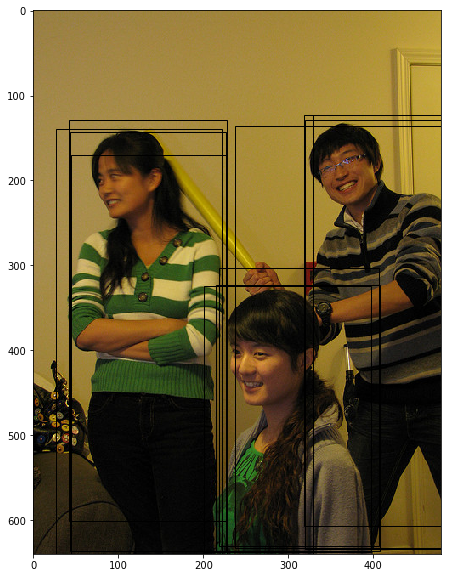

In [98]:
# 画图展示目标物体边界框
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.image import imread
import math

# 定义画矩形框的程序    
def draw_rectangle(currentAxis, bbox, edgecolor = 'k', facecolor = 'y', fill=False, linestyle='-'):
    # currentAxis，坐标轴，通过plt.gca()获取
    # bbox，边界框，包含四个数值的list， [x1, y1, x2, y2]
    # edgecolor，边框线条颜色
    # facecolor，填充颜色
    # fill, 是否填充
    # linestype，边框线型
    # patches.Rectangle需要传入左上角坐标、矩形区域的宽度、高度等参数
    rect=patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0]+1, bbox[3]-bbox[1]+1, linewidth=1,
                           edgecolor=edgecolor,facecolor=facecolor,fill=fill, linestyle=linestyle)
    currentAxis.add_patch(rect)

    
plt.figure(figsize=(10, 10))

filename = '/home/aistudio/work/images/section3/000000086956.jpg'
im = imread(filename)
plt.imshow(im)

currentAxis=plt.gca()

# 预测框位置
boxes = np.array([[4.21716537e+01, 1.28230896e+02, 2.26547668e+02, 6.00434631e+02],
       [3.18562988e+02, 1.23168472e+02, 4.79000000e+02, 6.05688416e+02],
       [2.62704697e+01, 1.39430557e+02, 2.20587097e+02, 6.38959656e+02],
       [4.24965363e+01, 1.42706665e+02, 2.25955185e+02, 6.35671204e+02],
       [2.37462646e+02, 1.35731537e+02, 4.79000000e+02, 6.31451294e+02],
       [3.19390472e+02, 1.29295090e+02, 4.79000000e+02, 6.33003845e+02],
       [3.28933838e+02, 1.22736115e+02, 4.79000000e+02, 6.39000000e+02],
       [4.44292603e+01, 1.70438187e+02, 2.26841858e+02, 6.39000000e+02],
       [2.17988785e+02, 3.02472412e+02, 4.06062927e+02, 6.29106628e+02],
       [2.00241089e+02, 3.23755096e+02, 3.96929321e+02, 6.36386108e+02],
       [2.14310303e+02, 3.23443665e+02, 4.06732849e+02, 6.35775269e+02]])

# 预测框得分
scores = np.array([0.5247661 , 0.51759845, 0.86075854, 0.9910175 , 0.39170712,
       0.9297706 , 0.5115228 , 0.270992  , 0.19087596, 0.64201415, 0.879036])

# 画出所有预测框
for box in boxes:
    draw_rectangle(currentAxis, box)


这里使用非极大值抑制（non-maximum suppression, nms）来消除冗余框，其基本思想是，如果有多个预测框都对应同一个物体，则只选出得分最高的那个预测框，剩下的预测框被丢弃掉。那么如何判断两个预测框对应的是同一个物体呢，标准该怎么设置？如果两个预测框的类别一样，而且他们的位置重合度比较大，则可以认为他们是在预测同一个目标。非极大值抑制的做法是，选出某个类别得分最高的预测框，然后看哪些预测框跟它的IoU大于阈值，就把这些预测框给丢弃掉。这里IoU的阈值是超参数，需要提前设置，YOLO-V3模型里面设置的是0.5。

比如在上面的程序中，boxes里面一共对应11个预测框，scores给出了它们预测"人"这一类别的得分。

- Step0 创建选中列表，keep_list = []
- Step1 对得分进行排序，remain_list = [ 3,  5, 10,  2,  9,  0,  1,  6,  4,  7,  8]， 
- Step2 选出boxes[3]，此时keep_list为空，不需要计算IoU，直接将其放入keep_list，keep_list = [3]， remain_list=[5, 10,  2,  9,  0,  1,  6,  4,  7,  8]
- Step3 选出boxes[5]，此时keep_list中已经存在boxes[3]，计算出IoU(boxes[3], boxes[5]) = 0.0，显然小于阈值，则keep_list=[3, 5], remain_list = [10,  2,  9,  0,  1,  6,  4,  7,  8]
- Step4 选出boxes[10]，此时keep_list=[3, 5]，计算IoU(boxes[3], boxes[10])=0.0268，IoU(boxes[5], boxes[10])=0.0268 = 0.24，都小于阈值，则keep_list = [3, 5, 10]，remain_list=[2,  9,  0,  1,  6,  4,  7,  8]
- Step5 选出boxes[2]，此时keep_list = [3, 5, 10]，计算IoU(boxes[3], boxes[2]) = 0.88，超过了阈值，直接将boxes[2]丢弃，keep_list=[3, 5, 10]，remain_list=[9,  0,  1,  6,  4,  7,  8]
- Step6 选出boxes[9]，此时keep_list = [3, 5, 10]，计算IoU(boxes[3], boxes[9]) = 0.0577，IoU(boxes[5], boxes[9]) = 0.205，IoU(boxes[10], boxes[9]) = 0.88，超过了阈值，将boxes[9]丢弃掉。keep_list=[3, 5, 10]，remain_list=[0,  1,  6,  4,  7,  8]
- Step7 重复上述Step6直到remain_list为空

最终得到keep_list=[3, 5, 10]，也就是预测框3、5、10被最终挑选出来了，如下图所示

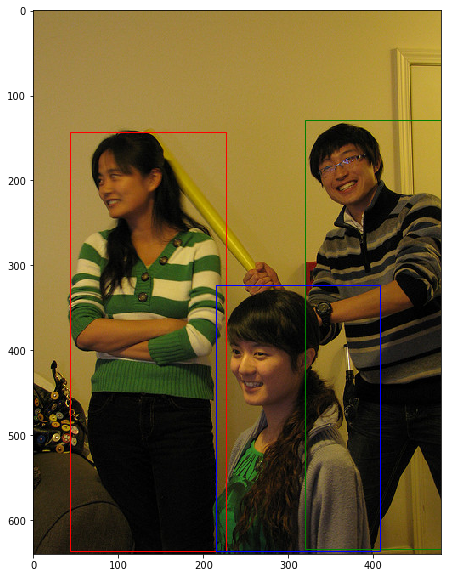

In [99]:
# 画图展示目标物体边界框
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.image import imread
import math

# 定义画矩形框的程序    
def draw_rectangle(currentAxis, bbox, edgecolor = 'k', facecolor = 'y', fill=False, linestyle='-'):
    # currentAxis，坐标轴，通过plt.gca()获取
    # bbox，边界框，包含四个数值的list， [x1, y1, x2, y2]
    # edgecolor，边框线条颜色
    # facecolor，填充颜色
    # fill, 是否填充
    # linestype，边框线型
    # patches.Rectangle需要传入左上角坐标、矩形区域的宽度、高度等参数
    rect=patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0]+1, bbox[3]-bbox[1]+1, linewidth=1,
                           edgecolor=edgecolor,facecolor=facecolor,fill=fill, linestyle=linestyle)
    currentAxis.add_patch(rect)

    
plt.figure(figsize=(10, 10))

filename = '/home/aistudio/work/images/section3/000000086956.jpg'
im = imread(filename)
plt.imshow(im)

currentAxis=plt.gca()

boxes = np.array([[4.21716537e+01, 1.28230896e+02, 2.26547668e+02, 6.00434631e+02],
       [3.18562988e+02, 1.23168472e+02, 4.79000000e+02, 6.05688416e+02],
       [2.62704697e+01, 1.39430557e+02, 2.20587097e+02, 6.38959656e+02],
       [4.24965363e+01, 1.42706665e+02, 2.25955185e+02, 6.35671204e+02],
       [2.37462646e+02, 1.35731537e+02, 4.79000000e+02, 6.31451294e+02],
       [3.19390472e+02, 1.29295090e+02, 4.79000000e+02, 6.33003845e+02],
       [3.28933838e+02, 1.22736115e+02, 4.79000000e+02, 6.39000000e+02],
       [4.44292603e+01, 1.70438187e+02, 2.26841858e+02, 6.39000000e+02],
       [2.17988785e+02, 3.02472412e+02, 4.06062927e+02, 6.29106628e+02],
       [2.00241089e+02, 3.23755096e+02, 3.96929321e+02, 6.36386108e+02],
       [2.14310303e+02, 3.23443665e+02, 4.06732849e+02, 6.35775269e+02]])
 
scores = np.array([0.5247661 , 0.51759845, 0.86075854, 0.9910175 , 0.39170712,
       0.9297706 , 0.5115228 , 0.270992  , 0.19087596, 0.64201415, 0.879036])

left_ind = np.where((boxes[:, 0]<60) * (boxes[:, 0]>20))
left_boxes = boxes[left_ind]
left_scores = scores[left_ind]

colors = ['r', 'g', 'b', 'k']

# 画出最终保留的预测框
inds = [3, 5, 10]
for i in range(3):
    box = boxes[inds[i]]
    draw_rectangle(currentAxis, box, edgecolor=colors[i])




非极大值抑制的具体实现代码如下面nms函数的定义，需要说明的是数据集中含有多个类别的物体，所以这里需要做多分类非极大值抑制，其实现原理与非极大值抑制相同，区别在于需要对每个类别都做非极大值抑制，实现代码如下面的multiclass_nms所示。

In [100]:
# 非极大值抑制
def nms(bboxes, scores, score_thresh, nms_thresh, pre_nms_topk, i=0, c=0):
    """
    nms
    """
    inds = np.argsort(scores)
    inds = inds[::-1]
    keep_inds = []
    while(len(inds) > 0):
        cur_ind = inds[0]
        cur_score = scores[cur_ind]
        # if score of the box is less than score_thresh, just drop it
        if cur_score < score_thresh:
            break

        keep = True
        for ind in keep_inds:
            current_box = bboxes[cur_ind]
            remain_box = bboxes[ind]
            iou = box_iou_xyxy(current_box, remain_box)
            if iou > nms_thresh:
                keep = False
                break
        if i == 0 and c == 4 and cur_ind == 951:
            print('suppressed, ', keep, i, c, cur_ind, ind, iou)
        if keep:
            keep_inds.append(cur_ind)
        inds = inds[1:]

    return np.array(keep_inds)

# 多分类非极大值抑制
def multiclass_nms(bboxes, scores, score_thresh=0.01, nms_thresh=0.45, pre_nms_topk=1000, pos_nms_topk=100):
    """
    This is for multiclass_nms
    """
    batch_size = bboxes.shape[0]
    class_num = scores.shape[1]
    rets = []
    for i in range(batch_size):
        bboxes_i = bboxes[i]
        scores_i = scores[i]
        ret = []
        for c in range(class_num):
            scores_i_c = scores_i[c]
            keep_inds = nms(bboxes_i, scores_i_c, score_thresh, nms_thresh, pre_nms_topk, i=i, c=c)
            if len(keep_inds) < 1:
                continue
            keep_bboxes = bboxes_i[keep_inds]
            keep_scores = scores_i_c[keep_inds]
            keep_results = np.zeros([keep_scores.shape[0], 6])
            keep_results[:, 0] = c
            keep_results[:, 1] = keep_scores[:]
            keep_results[:, 2:6] = keep_bboxes[:, :]
            ret.append(keep_results)
        if len(ret) < 1:
            rets.append(ret)
            continue
        ret_i = np.concatenate(ret, axis=0)
        scores_i = ret_i[:, 1]
        if len(scores_i) > pos_nms_topk:
            inds = np.argsort(scores_i)[::-1]
            inds = inds[:pos_nms_topk]
            ret_i = ret_i[inds]

        rets.append(ret_i)

    return rets

下面是完整的测试程序，在测试数据集上的输出结果将会被保存在pred_results.json文件中。

In [101]:
import json

ANCHORS = [10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 373, 326]
ANCHOR_MASKS = [[6, 7, 8], [3, 4, 5], [0, 1, 2]]
VALID_THRESH = 0.01
NMS_TOPK = 400
NMS_POSK = 100
NMS_THRESH = 0.45

NUM_CLASSES = 7
if __name__ == '__main__':
    TRAINDIR = '/home/aistudio/work/insects/train/images'
    TESTDIR = '/home/aistudio/work/insects/test/images'
    VALIDDIR = '/home/aistudio/work/insects/val'
    with fluid.dygraph.guard():
        model = YOLOv3('yolov3', num_classes=NUM_CLASSES, is_train=False)
        params_file_path = '/home/aistudio/work/yolo_epoch50'
        model_state_dict, _ = fluid.load_dygraph(params_file_path)
        model.load_dict(model_state_dict)
        model.eval()

        total_results = []
        test_loader = test_data_loader(TESTDIR, batch_size= 1, mode='test')
        for i, data in enumerate(test_loader()):
            img_name, img_data, img_scale_data = data
            img = to_variable(img_data)
            img_scale = to_variable(img_scale_data)

            outputs = model.forward(img)
            bboxes, scores = model.get_pred(outputs,
                                     im_shape=img_scale,
                                     anchors=ANCHORS,
                                     anchor_masks=ANCHOR_MASKS,
                                     valid_thresh = VALID_THRESH)

            bboxes_data = bboxes.numpy()
            scores_data = scores.numpy()
            result = multiclass_nms(bboxes_data, scores_data,
                          score_thresh=VALID_THRESH, 
                          nms_thresh=NMS_THRESH, 
                          pre_nms_topk=NMS_TOPK, 
                          pos_nms_topk=NMS_POSK)
            for j in range(len(result)):
                result_j = result[j]
                img_name_j = img_name[j]
                total_results.append([img_name_j, result_j.tolist()])
            print('processed {} pictures'.format(len(total_results)))

        print('')
        json.dump(total_results, open('pred_results.json', 'w'))



json文件中保存着测试结果，是包含所有图片预测结果的list，其构成如下：

    [[img_name, [[label, score, x1, x2, y1, y2], ..., [label, score, x1, x2, y1, y2]]], 
     [img_name, [[label, score, x1, x2, y1, y2], ..., [label, score, x1, x2, y1, y2]]],
      ...
     [img_name, [[label, score, x1, x2, y1, y2],..., [label, score, x1, x2, y1, y2]]]]

list中的每一个元素是一张图片的预测结果，list的总长度等于图片的数目，每张图片预测结果的格式是：

     [img_name, [[label, score, x1, x2, y1, y2],..., [label, score, x1, x2, y1, y2]]]
     
其中第一个元素是图片名称image_name，第二个元素是包含该图片所有预测框的list， 预测框列表：

     [[label, score, x1, x2, y1, y2],..., [label, score, x1, x2, y1, y2]]
     
预测框列表中每个元素[label, score, x1, x2, y1, y2]描述了一个预测框，label是预测框所属类别标签，score是预测框的得分；x1, x2, y1, y2对应预测框左上角坐标(x1, y1)，右下角坐标(x2, y2)。每张图片可能有很多个预测框，则将其全部放在预测框列表中。

在AI识虫比赛的基础版本中，老师提供了MAP指标计算代码，使用此pred_results.json文件即可计算出最终的评估指标。


### 模型效果及可视化展示

上面的程序展示了如何读取测试数据集的读片，并将最终结果保存在json格式的文件中。为了更直观的给读者展示模型效果，下面的程序添加了如何读取单张图片，并画出其产生的预测框。

1. 创建数据读取器以读取单张图片的数据

In [102]:
# 读取单张测试图片
def single_image_data_loader(filename, test_image_size=608, mode='test'):
    """
    加载测试用的图片，测试数据没有groundtruth标签
    """
    batch_size= 1
    def reader():
        batch_data = []
        img_size = test_image_size
        file_path = os.path.join(filename)
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        H = img.shape[0]
        W = img.shape[1]
        img = cv2.resize(img, (img_size, img_size))

        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        mean = np.array(mean).reshape((1, 1, -1))
        std = np.array(std).reshape((1, 1, -1))
        out_img = (img / 255.0 - mean) / std
        out_img = out_img.astype('float32').transpose((2, 0, 1))
        img = out_img #np.transpose(out_img, (2,0,1))
        im_shape = [H, W]

        batch_data.append((image_name.split('.')[0], img, im_shape))
        if len(batch_data) == batch_size:
            yield make_test_array(batch_data)
            batch_data = []

    return reader

2. 定义绘制预测框的画图函数，代码如下。

In [108]:
# 定义画图函数


INSECT_NAMES = ['Boerner', 'Leconte', 'Linnaeus', 
                'acuminatus', 'armandi', 'coleoptera', 'linnaeus']

# 定义画矩形框的函数 
def draw_rectangle(currentAxis, bbox, edgecolor = 'k', facecolor = 'y', fill=False, linestyle='-'):
    # currentAxis，坐标轴，通过plt.gca()获取
    # bbox，边界框，包含四个数值的list， [x1, y1, x2, y2]
    # edgecolor，边框线条颜色
    # facecolor，填充颜色
    # fill, 是否填充
    # linestype，边框线型
    # patches.Rectangle需要传入左上角坐标、矩形区域的宽度、高度等参数
    rect=patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0]+1, bbox[3]-bbox[1]+1, linewidth=1,
                           edgecolor=edgecolor,facecolor=facecolor,fill=fill, linestyle=linestyle)
    currentAxis.add_patch(rect)

# 定义绘制预测结果的函数
def draw_results(result, filename, draw_thresh=0.5):
    plt.figure(figsize=(10, 10))
    im = imread(filename)
    plt.imshow(im)
    currentAxis=plt.gca()
    colors = ['r', 'g', 'b', 'k', 'y', 'c', 'purple']
    for item in result:
        box = item[2:6]
        label = int(item[0])
        name = INSECT_NAMES[label]
        if item[1] > draw_thresh:
            draw_rectangle(currentAxis, box, edgecolor = colors[label])
            plt.text(box[0], box[1], name, fontsize=12, color=colors[label])

3. 使用上面定义的single_image_data_loader函数读取指定的图片，输入网络并计算出预测框和得分，然后使用多分类非极大值抑制消除冗余的框。将最终结果画图展示出来。

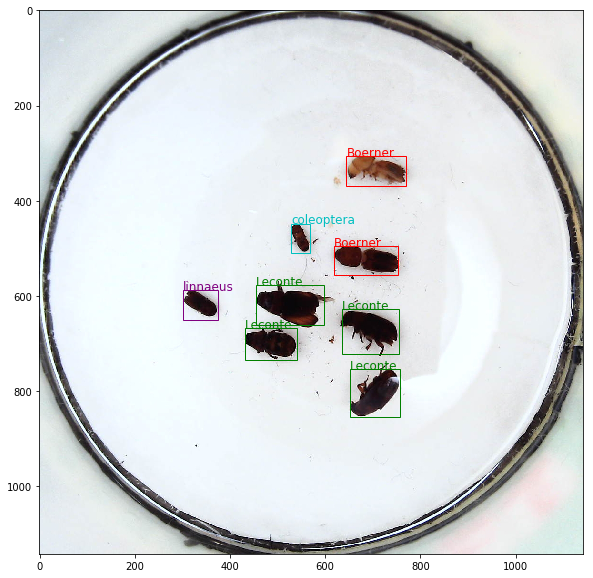

In [109]:
import json

import paddle
import paddle.fluid as fluid

ANCHORS = [10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 373, 326]
ANCHOR_MASKS = [[6, 7, 8], [3, 4, 5], [0, 1, 2]]
VALID_THRESH = 0.01
NMS_TOPK = 400
NMS_POSK = 100
NMS_THRESH = 0.45

NUM_CLASSES = 7
if __name__ == '__main__':
    image_name = '/home/aistudio/work/insects/test/images/2599.jpeg'
    params_file_path = '/home/aistudio/work/yolo_epoch50'
    with fluid.dygraph.guard():
        model = YOLOv3('yolov3', num_classes=NUM_CLASSES, is_train=False)
        model_state_dict, _ = fluid.load_dygraph(params_file_path)
        model.load_dict(model_state_dict)
        model.eval()

        total_results = []
        test_loader = single_image_data_loader(image_name, mode='test')
        for i, data in enumerate(test_loader()):
            img_name, img_data, img_scale_data = data
            img = to_variable(img_data)
            img_scale = to_variable(img_scale_data)

            outputs = model.forward(img)
            bboxes, scores = model.get_pred(outputs,
                                     im_shape=img_scale,
                                     anchors=ANCHORS,
                                     anchor_masks=ANCHOR_MASKS,
                                     valid_thresh = VALID_THRESH)

            bboxes_data = bboxes.numpy()
            scores_data = scores.numpy()
            results = multiclass_nms(bboxes_data, scores_data,
                          score_thresh=VALID_THRESH, 
                          nms_thresh=NMS_THRESH, 
                          pre_nms_topk=NMS_TOPK, 
                          pos_nms_topk=NMS_POSK)

result = results[0]
draw_results(result, image_name, draw_thresh=0.5)

通过上面的程序，清晰的给读者展示了如何使用训练好的权重，对图片进行预测并将结果可视化。最终输出的图片上，检测出了每个昆虫，标出了它们的边界框和具体类别。